In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
dfMatchData= pd.read_csv('/kaggle/input/odi-mens-cricket-match-data-2002-2023/ODI_Match_Data.csv')

/tmp/ipykernel_32/43390963.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfMatchData= pd.read_csv('/kaggle/input/odi-mens-cricket-match-data-2002-2023/ODI_Match_Data.csv')


In [3]:
dfMatchInf=pd.read_csv("/kaggle/input/odi-mens-cricket-match-data-2002-2023/ODI_Match_info.csv")

### Columns available


In [4]:
dfMatchInf.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
dfMatchData.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id'],
      dtype='object')

In [6]:
dfMatchInf.team1.unique()

array(['India', 'England', 'New Zealand', 'Australia', 'Sri Lanka',
       'South Africa', 'Bangladesh', 'Pakistan', 'Nepal', 'Afghanistan',
       'West Indies', 'Scotland', 'United Arab Emirates', 'Oman',
       'Netherlands', 'Zimbabwe', 'United States of America', 'Ireland',
       'Canada', 'Namibia', 'Jersey', 'Papua New Guinea', 'Hong Kong',
       'Kenya', 'Africa XI', 'Bermuda'], dtype=object)

In [7]:
dfMatchInf.team2.unique()

array(['Australia', 'Ireland', 'Bangladesh', 'India', 'New Zealand',
       'Sri Lanka', 'Pakistan', 'South Africa', 'Afghanistan', 'Nepal',
       'West Indies', 'Netherlands', 'United States of America',
       'Zimbabwe', 'Oman', 'Scotland', 'United Arab Emirates',
       'Papua New Guinea', 'Jersey', 'Canada', 'Namibia', 'England',
       'Hong Kong', 'Kenya', 'Bermuda', 'Asia XI', 'ICC World XI'],
      dtype=object)

In [8]:
totalMatchCounts =dfMatchInf.team2.value_counts().add(dfMatchInf.team1.value_counts(), fill_value=0)


In [9]:
totalMatchCounts

Afghanistan                 123.0
Africa XI                     5.0
Asia XI                       5.0
Australia                   441.0
Bangladesh                  310.0
Bermuda                      12.0
Canada                       37.0
England                     406.0
Hong Kong                    18.0
ICC World XI                  2.0
India                       491.0
Ireland                     151.0
Jersey                        4.0
Kenya                        41.0
Namibia                      44.0
Nepal                        56.0
Netherlands                  63.0
New Zealand                 353.0
Oman                         45.0
Pakistan                    386.0
Papua New Guinea             56.0
Scotland                     98.0
South Africa                356.0
Sri Lanka                   458.0
United Arab Emirates         93.0
United States of America     50.0
West Indies                 365.0
Zimbabwe                    289.0
Name: count, dtype: float64

In [10]:
totalMatchCountsCleaned=totalMatchCounts[totalMatchCounts>30]

In [11]:
'India' in totalMatchCountsCleaned.index

True

# Matches played per team

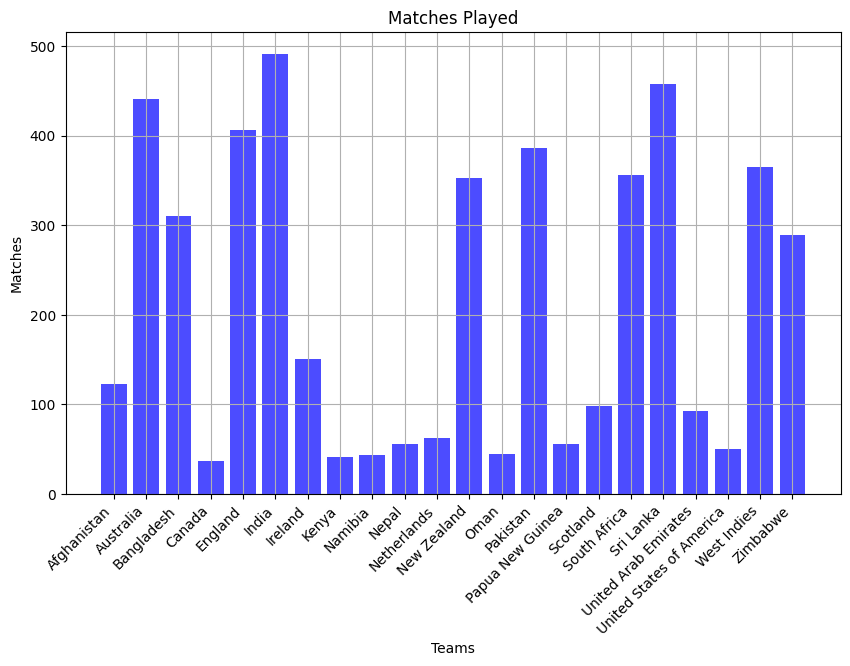

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(totalMatchCountsCleaned.index, totalMatchCountsCleaned.values, color='blue', alpha=0.7)
plt.xlabel('Teams')
plt.ylabel('Matches')
plt.title('Matches Played')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
# Show the histogram
plt.savefig('matchPlayed.png')
plt.show()

In [13]:
matchWon= dfMatchInf[dfMatchInf.winner.isin(totalMatchCountsCleaned.index)].winner.value_counts()

In [14]:
winPercentage= matchWon/totalMatchCountsCleaned* 100

# Win Percentage

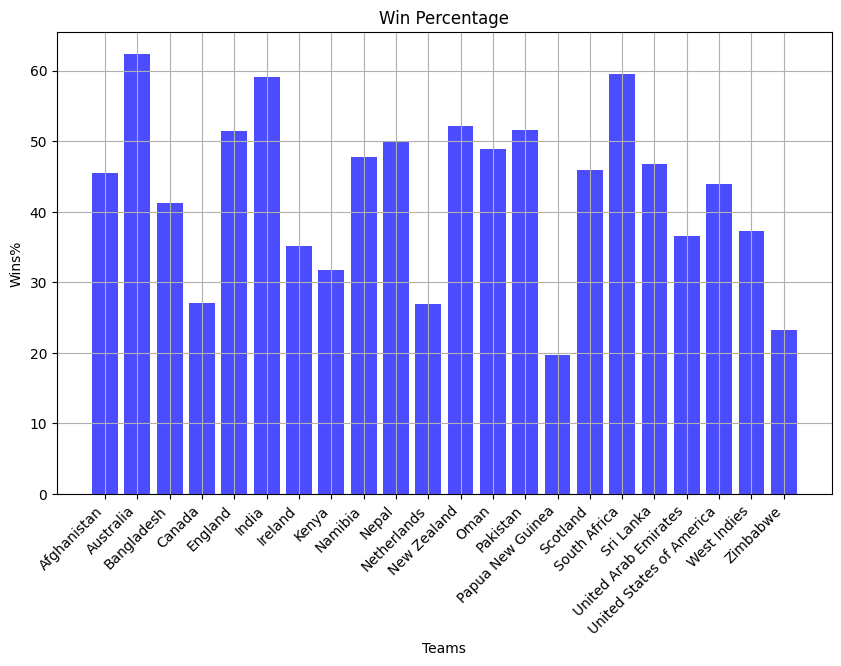

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(winPercentage.index, winPercentage.values, color='blue', alpha=0.7)
plt.xlabel('Teams')
plt.ylabel('Wins%')
plt.title('Win Percentage')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
# Show the histogram
plt.show()

# Toss win and match win scatter plot

In [16]:
dfMatchInf

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,65634,2002/03,Sydney,2003/01/09,Sri Lanka,Australia,Australia,field,normal,0,Sri Lanka,79,0,ST Jayasuriya,Sydney Cricket Ground,RB Tiffin,SJA Taufel,DB Hair
2375,64817,2002/03,Wellington,2003/01/08,New Zealand,India,New Zealand,bat,normal,0,India,0,2,Z Khan,"Westpac Stadium, Wellington",BF Bowden,DJ Harper,DB Cowie
2376,64816,2002/03,Queenstown,2003/01/04,India,New Zealand,New Zealand,field,normal,0,New Zealand,0,7,AR Adams,"Davies Park, Queenstown",EAR de Silva,DB Cowie,AL Hill
2377,64815,2002/03,Christchurch,2003/01/01,India,New Zealand,India,bat,normal,0,New Zealand,0,5,DR Tuffey,"Jade Stadium, Christchurch",EAR de Silva,DB Cowie,AL Hill


In [17]:
tossAndMatchWin=dfMatchInf[dfMatchInf.toss_winner==dfMatchInf.winner]

In [18]:
tossAndMatchLoss = dfMatchInf[dfMatchInf.toss_winner!=dfMatchInf.winner]


In [19]:
tossWinCounts=dfMatchInf.toss_winner.value_counts()

In [20]:
tossWinCounts=tossWinCounts[totalMatchCountsCleaned.index]

In [21]:
tossWinCounts

Afghanistan                  60
Australia                   223
Bangladesh                  155
Canada                       20
England                     200
India                       243
Ireland                      81
Kenya                        18
Namibia                      27
Nepal                        31
Netherlands                  36
New Zealand                 176
Oman                         23
Pakistan                    190
Papua New Guinea             27
Scotland                     46
South Africa                183
Sri Lanka                   226
United Arab Emirates         46
United States of America     19
West Indies                 177
Zimbabwe                    153
Name: count, dtype: int64

In [22]:
tossAndMatchLoss.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus
5,1388414,2023,Colombo,2023/09/17,Sri Lanka,India,Sri Lanka,bat,normal,0,India,0,10,Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney
6,1373575,2023/24,Johannesburg,2023/09/17,South Africa,Australia,Australia,field,normal,0,South Africa,122,0,M Jansen,"The Wanderers Stadium, Johannesburg",A Paleker,RA Kettleborough,Nitin Menon


In [23]:
tossAndMatchWin.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
8,1336055,2023,London,2023/09/15,England,New Zealand,England,bat,normal,0,England,100,0,DJ Malan,"Lord's, London",AT Holdstock,MJ Saggers,PR Reiffel
13,1388407,2023,Colombo,2023/09/12,India,Sri Lanka,India,bat,normal,0,India,41,0,DN Wellalage,"R Premadasa Stadium, Colombo",Masudur Rahman,RK Illingworth,P Wilson
18,1336052,2023,Cardiff,2023/09/08,England,New Zealand,New Zealand,field,normal,0,New Zealand,0,8,DP Conway,"Sophia Gardens, Cardiff",AG Wharf,PR Reiffel,AT Holdstock


In [24]:
tossAndMatchWin=tossAndMatchWin['winner'].value_counts()

In [25]:
tossAndMatchLoss=tossAndMatchLoss['toss_winner'].value_counts()

In [26]:
tossAndMatchLoss=tossAndMatchLoss[totalMatchCounts>30 ]

In [27]:
tossAndMatchWin=tossAndMatchWin[totalMatchCounts>30 ]

In [28]:
tossAndMatchWin

winner
India                       150
Australia                   129
Sri Lanka                   107
South Africa                106
England                     105
New Zealand                  94
Pakistan                     94
Bangladesh                   66
West Indies                  64
Zimbabwe                     35
Ireland                      28
Afghanistan                  27
Scotland                     25
Nepal                        18
United Arab Emirates         14
Namibia                      14
Oman                         12
Netherlands                  11
United States of America      9
Canada                        5
Papua New Guinea              5
Kenya                         5
Name: count, dtype: int64

In [29]:
tossAndMatchWin['India']/tossWinCounts['India']

0.6172839506172839

In [30]:
# # Get the union of indices
# all_indices = tossAndMatchWin.index.union(tossAndMatchLoss.index)

# # Initialize a new Series with zeros for all indices
# tmw = pd.Series(0, index=all_indices)
# tml = pd.Series(0, index=all_indices)
# # Update the values from series1 and series2
# tmw.update(tossAndMatchWin)
# tml.update(tossAndMatchLoss)

In [31]:
# mean_val = tmw.mean()
# std_dev = tmw.std()
# tmw = (tmw - mean_val) / std_dev
# mean_val = tml.mean()
# std_dev = tml.std()
# tml = (tml - mean_val) / std_dev

In [32]:
# min_val = tossAndMatchWin.min()
# max_val = tossAndMatchWin.max()
# tossAndMatchWin = ((tossAndMatchWin - min_val)+1) / (max_val - min_val)
# min_val = tossAndMatchLoss.min()
# max_val = tossAndMatchLoss.max()
# tossAndMatchLoss = ((tossAndMatchLoss - min_val)+1) / (max_val - min_val)

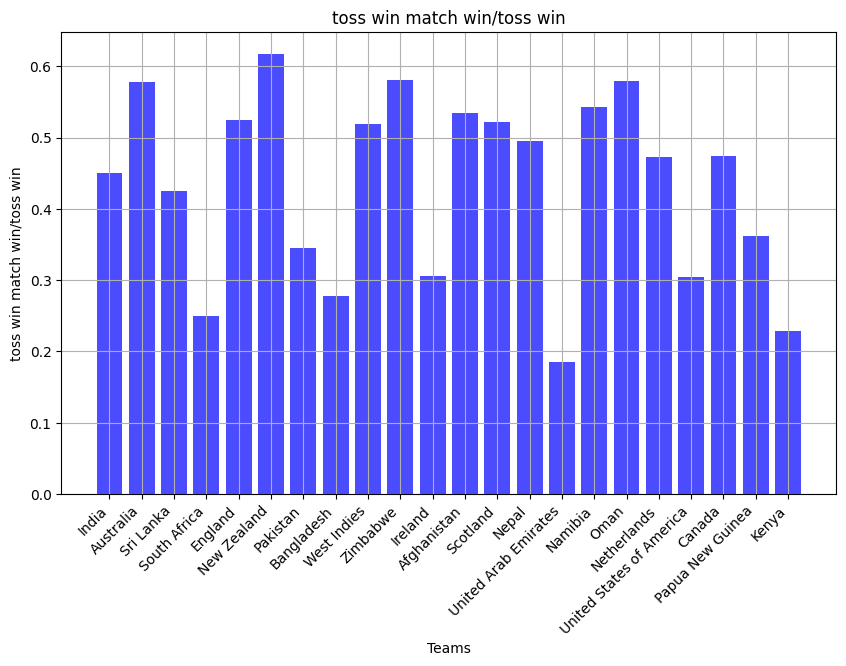

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(tossAndMatchWin.index, tossAndMatchWin/tossWinCounts, color='blue', alpha=0.7)
plt.xlabel('Teams')
plt.ylabel('toss win match win/toss win')
plt.title('toss win match win/toss win')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
# Show the histogram
plt.show()

In [34]:
tossAndMatchWin/tossWinCounts

Afghanistan                 0.450000
Australia                   0.578475
Bangladesh                  0.425806
Canada                      0.250000
England                     0.525000
India                       0.617284
Ireland                     0.345679
Kenya                       0.277778
Namibia                     0.518519
Nepal                       0.580645
Netherlands                 0.305556
New Zealand                 0.534091
Oman                        0.521739
Pakistan                    0.494737
Papua New Guinea            0.185185
Scotland                    0.543478
South Africa                0.579235
Sri Lanka                   0.473451
United Arab Emirates        0.304348
United States of America    0.473684
West Indies                 0.361582
Zimbabwe                    0.228758
Name: count, dtype: float64

In [35]:
tossAndMatchLoss

toss_winner
Sri Lanka                   119
Zimbabwe                    118
West Indies                 113
Pakistan                     96
England                      95
Australia                    94
India                        93
Bangladesh                   89
New Zealand                  82
South Africa                 77
Ireland                      53
Afghanistan                  33
United Arab Emirates         32
Netherlands                  25
Papua New Guinea             22
Scotland                     21
Canada                       15
Nepal                        13
Namibia                      13
Kenya                        13
Oman                         11
United States of America     10
Name: count, dtype: int64

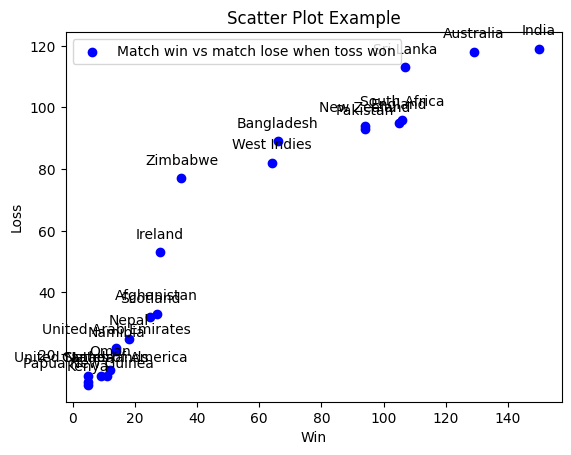

In [36]:
import matplotlib.pyplot as plt
import numpy as np

x=tossAndMatchWin.values
y= tossAndMatchLoss.values
plt.scatter(x, y, marker='o', color='blue', label="Match win vs match lose when toss won")

for i, label in enumerate(tossAndMatchWin.index):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Win')
plt.ylabel('Loss')
plt.title('Scatter Plot Example')

plt.legend()

plt.show()


# Winner prediction
Related features? 
venue, session(newer pitches are batting pitches),team, opener?,opponent,toss result,

In [37]:
dfMatchInf.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [38]:
dfMatchInfo= dfMatchInf[[ 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'winner',
       'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3']]

## Working with teams that have played more than 30 matches

In [39]:
dfMatchInfo=dfMatchInfo[(dfMatchInfo.team1.isin( totalMatchCountsCleaned.index)) | (dfMatchInfo.team2.isin( totalMatchCountsCleaned.index)) ]

## Dropping matches where there isn't any winners

In [40]:
dfMatchInfo = dfMatchInfo.dropna(subset=['winner'])

In [41]:
dfMatchInfo

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,player_of_match,venue,umpire1,umpire2,umpire3
0,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,India,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,England,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,New Zealand,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,India,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
5,2023,Colombo,2023/09/17,Sri Lanka,India,Sri Lanka,bat,normal,India,Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,2002/03,Sydney,2003/01/09,Sri Lanka,Australia,Australia,field,normal,Sri Lanka,ST Jayasuriya,Sydney Cricket Ground,RB Tiffin,SJA Taufel,DB Hair
2375,2002/03,Wellington,2003/01/08,New Zealand,India,New Zealand,bat,normal,India,Z Khan,"Westpac Stadium, Wellington",BF Bowden,DJ Harper,DB Cowie
2376,2002/03,Queenstown,2003/01/04,India,New Zealand,New Zealand,field,normal,New Zealand,AR Adams,"Davies Park, Queenstown",EAR de Silva,DB Cowie,AL Hill
2377,2002/03,Christchurch,2003/01/01,India,New Zealand,India,bat,normal,New Zealand,DR Tuffey,"Jade Stadium, Christchurch",EAR de Silva,DB Cowie,AL Hill


### We are introducing a feature 'isHome1' and 'isHome2' which is 1 if team1 or team2 are playing in their home respectively and 0 if not.

In [42]:
dfMatchInfo['city'].unique()

array(['Indore', 'Nottingham', 'Dhaka', 'Chandigarh', 'Colombo',
       'Johannesburg', 'London', 'Centurion', 'Potchefstroom',
       'Southampton', 'Bloemfontein', 'Cardiff', 'Lahore', 'Kandy',
       'Multan', 'Hambantota', 'Tarouba', 'Bridgetown', 'Chattogram',
       'Harare', 'Bulawayo', 'Sharjah', 'Chelmsford', 'Karachi',
       'Kirtipur', 'Rawalpindi', 'Kathmandu', 'Windhoek', 'Benoni',
       'Hamilton', 'Auckland', 'Sylhet', 'Chennai', 'Visakhapatnam',
       'East London', 'Mumbai', 'Dubai', 'Kimberley', 'Raipur',
       'Hyderabad', 'Thiruvananthapuram', 'Kolkata', 'Guwahati',
       'Melbourne', 'Sydney', 'Adelaide', 'Delhi', 'Ranchi', 'Lucknow',
       'Port Moresby', 'Cairns', 'Townsville', 'Rotterdam', 'Aberdeen',
       'Edinburgh', 'Port of Spain', 'Manchester', 'Chester-le-Street',
       'Glasgow', 'Providence', 'Ayr', 'Dublin', 'Amstelveen', 'Pearland',
       'Mount Maunganui', 'Ahmedabad', 'Al Amarat', 'Doha', 'Cape Town',
       'Paarl', 'Kingston', 'Belfast', 

In [43]:
dfMatchInfo['team1'].unique()

array(['India', 'England', 'New Zealand', 'Australia', 'Sri Lanka',
       'South Africa', 'Bangladesh', 'Pakistan', 'Nepal', 'Afghanistan',
       'West Indies', 'Scotland', 'United Arab Emirates', 'Oman',
       'Netherlands', 'Zimbabwe', 'United States of America', 'Ireland',
       'Canada', 'Namibia', 'Jersey', 'Papua New Guinea', 'Hong Kong',
       'Kenya', 'Bermuda'], dtype=object)

In [44]:
country_to_city = {
    'India': ['Indore', 'Chandigarh', 'Chennai', 'Visakhapatnam', 'Mumbai', 'Hyderabad', 'Kolkata', 'Guwahati', 'Delhi', 'Ranchi', 'Lucknow', 'Bengaluru', 'Rajkot', 'Ahmedabad', 'Pune', 'Dharamsala', 'Kanpur', 'Jaipur', 'Bangalore', 'King City', 'Gwalior', 'Nagpur', 'Margao', 'Bogra', 'Jamshedpur', 'Faridabad', 'Peshawar'],
    'England': ['Nottingham', 'London', 'Cardiff', 'Manchester', 'Chester-le-Street', 'Bristol', 'Leeds', 'Taunton'],
    'Bangladesh': ['Dhaka', 'Chattogram', 'Sylhet', 'Chittagong', 'Fatullah', 'Khulna'],
    'Australia': ['Melbourne', 'Sydney', 'Adelaide', 'Hobart', 'Perth', 'Brisbane'],

    'Sri Lanka': ['Colombo', 'Kandy', 'Hambantota'],
    'South Africa': ['Johannesburg', 'Centurion', 'Potchefstroom', 'Bloemfontein', 'Kimberley'],
    'West Indies': ['Bridgetown', 'Tarouba', 'Port of Spain', 'Providence', 'North Sound', 'Kingston', 'Jamaica', 'Antigua', 'Trinidad', 'St Lucia', 'Barbados', 'Grenada', 'St Vincent', 'Kingstown'],
    'Pakistan': ['Lahore', 'Multan', 'Karachi', 'Rawalpindi', 'Kathmandu', 'King City', 'Gwalior', 'Peshawar'],
    'Nepal': ['Kirtipur', 'Kathmandu'],
    'Afghanistan': ['Kathmandu'],
    'Scotland': ['Aberdeen', 'Edinburgh'],
    'United Arab Emirates': ['Dubai', 'Sharjah'],
    'Oman': ['Muscat'],
    'Netherlands': ['Rotterdam', 'Amstelveen'],
    'Zimbabwe': ['Harare', 'Bulawayo'],
    'United States of America': ['Lauderhill', 'New York'],
    'Ireland': ['Dublin'],
    'Canada': ['Toronto'],
    'Namibia': ['Windhoek'],
    'Jersey': ['St Helier'],
    'Papua New Guinea': ['Port Moresby'],
    'Hong Kong': ['Hong Kong'],
    'Kenya': ['Nairobi', 'Mombasa'],
    'Africa XI': ['Durban', 'Centurion'],
    'Bermuda': ['Hamilton']
}


In [45]:
import pandas as pd


def label_is_home(row, country_to_city):
    team1 = row['team1']
    team2 = row['team2']
    city = row['city']
    
  
    isHome1 = 1 if team1 in country_to_city and city in country_to_city[team1] else 0
    

    isHome2 = 1 if team2 in country_to_city and city in country_to_city[team2] else 0

    return pd.Series([isHome1, isHome2])

dfMatchInfo[['isHome1', 'isHome2']] = dfMatchInfo.apply(lambda row: label_is_home(row, country_to_city), axis=1, result_type='expand')



In [46]:
dfMatchInfo.winner.value_counts()

winner
India                       290
Australia                   275
Sri Lanka                   214
South Africa                212
England                     209
Pakistan                    199
New Zealand                 184
West Indies                 136
Bangladesh                  128
Zimbabwe                     67
Afghanistan                  56
Ireland                      53
Scotland                     45
United Arab Emirates         34
Nepal                        28
Oman                         22
United States of America     22
Namibia                      21
Netherlands                  17
Kenya                        13
Papua New Guinea             11
Canada                       10
Hong Kong                     6
Bermuda                       2
Jersey                        1
Name: count, dtype: int64

In [47]:
dfMatchInfo.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,player_of_match,venue,umpire1,umpire2,umpire3,isHome1,isHome2
0,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,India,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan,1,0
1,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,England,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel,1,0
2,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,New Zealand,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon,0,1
3,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,India,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal,0,1
5,2023,Colombo,2023/09/17,Sri Lanka,India,Sri Lanka,bat,normal,India,Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney,1,0


### Winner column will be 1 if team1 won and 0 otherwise

In [48]:
dfMatchInfo['winner']=dfMatchInfo.apply(lambda row: 1 if row.team1==row.winner else 0, axis=1, result_type='expand')

In [49]:
dfMatchInfo.winner.value_counts()

winner
1    1245
0    1010
Name: count, dtype: int64

### We introduce a feature called tossOutcome where there are 4 probable values  wonAndField, wonAndBat, lostAndBat and lostAndField from the perspective of team1.
As the decision to bat or field depends on the condition of the field. This information may be important to predict Winners

In [50]:
def tossDecisionEncode(row):
    if row.toss_winner==row.team1 and row.toss_decision=='field':
        return "wonAndField";
    elif row.toss_winner==row.team1 and row.toss_decision=='bat':
        return "wonAndBat";
    elif row.toss_winner!=row.team1 and row.toss_decision=='field':
        return "lostAndField";
    elif row.toss_winner!=row.team1 and row.toss_decision=='bat':
        return "lostAndBat";


    

In [51]:
dfMatchInfo['tossDecision']=dfMatchInfo.apply(lambda row: tossDecisionEncode(row), axis=1, result_type='expand')

In [52]:
dfMatchInfo['tossWinner']=dfMatchInfo.apply(lambda row: 1 if row.team1==row.toss_winner else 0, axis=1, result_type='expand')

### We also assign a feature month as each month has may have a specific weather pattern.

In [53]:
dfMatchInfo['season'].nunique()

43

In [54]:
# Convert the 'date' column to datetime format
dfMatchInfo['date'] = pd.to_datetime(dfMatchInfo['date'])

# Extract the month and create a new column 'month'
dfMatchInfo['month'] = dfMatchInfo['date'].dt.month

In [55]:
dfMatchInfo

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,player_of_match,venue,umpire1,umpire2,umpire3,isHome1,isHome2,tossDecision,tossWinner,month
0,2023/24,Indore,2023-09-24,India,Australia,Australia,field,D/L,1,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan,1,0,lostAndField,0,9
1,2023,Nottingham,2023-09-23,England,Ireland,Ireland,field,normal,1,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel,1,0,lostAndField,0,9
2,2023,Dhaka,2023-09-23,New Zealand,Bangladesh,New Zealand,bat,normal,1,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon,0,1,wonAndBat,1,9
3,2023/24,Chandigarh,2023-09-22,Australia,India,India,field,normal,0,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal,0,1,lostAndField,0,9
5,2023,Colombo,2023-09-17,Sri Lanka,India,Sri Lanka,bat,normal,0,Mohammed Siraj,"R Premadasa Stadium, Colombo",Ahmed Shah Pakteen,RK Illingworth,CB Gaffaney,1,0,wonAndBat,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,2002/03,Sydney,2003-01-09,Sri Lanka,Australia,Australia,field,normal,1,ST Jayasuriya,Sydney Cricket Ground,RB Tiffin,SJA Taufel,DB Hair,0,1,lostAndField,0,1
2375,2002/03,Wellington,2003-01-08,New Zealand,India,New Zealand,bat,normal,0,Z Khan,"Westpac Stadium, Wellington",BF Bowden,DJ Harper,DB Cowie,0,0,wonAndBat,1,1
2376,2002/03,Queenstown,2003-01-04,India,New Zealand,New Zealand,field,normal,0,AR Adams,"Davies Park, Queenstown",EAR de Silva,DB Cowie,AL Hill,0,0,lostAndField,0,1
2377,2002/03,Christchurch,2003-01-01,India,New Zealand,India,bat,normal,0,DR Tuffey,"Jade Stadium, Christchurch",EAR de Silva,DB Cowie,AL Hill,0,0,wonAndBat,1,1


In [56]:
columns_to_drop = ['toss_winner','tossWinner','toss_decision','result', 'player_of_match','venue','city','umpire1','umpire2','umpire3','season','season','date']

# Drop the specified columns
dfMatchInfo = dfMatchInfo.drop(columns=columns_to_drop)

In [57]:
dfMatchInfo

,team1,team2,winner,isHome1,isHome2,tossDecision,month
0,India,Australia,1,1,0,lostAndField,9
1,England,Ireland,1,1,0,lostAndField,9
2,New Zealand,Bangladesh,1,0,1,wonAndBat,9
3,Australia,India,0,0,1,lostAndField,9
5,Sri Lanka,India,0,1,0,wonAndBat,9
...,...,...,...,...,...,...,...
2374,Sri Lanka,Australia,1,0,1,lostAndField,1
2375,New Zealand,India,0,0,0,wonAndBat,1
2376,India,New Zealand,0,0,0,lostAndField,1
2377,India,New Zealand,0,0,0,wonAndBat,1


In [58]:
# dfMatchInfo.to_csv('dfMatchInfo_new.csv')

In [59]:
# dfEncoded.corr()
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 8))
# sns.heatmap(dfMatchInfo[['winner','isHome1','isHome2','month']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix Heatmap')
# plt.show()

### We perform one-hot encoding on the categorical columns.
#### Another approach could be assigning ordinal encoding to the teams based on their ODI ranking during their match

In [60]:
import pandas as pd


dfEncoded = pd.get_dummies(dfMatchInfo, columns=['team1'], prefix='team1')


dfEncoded = pd.get_dummies(dfEncoded, columns=['team2'], prefix='team2')
dfEncoded = pd.get_dummies(dfEncoded, columns=['tossDecision'], prefix='team1')

In [61]:
colsX= dfEncoded.columns.to_list()

In [62]:
colsX.pop(0)

'winner'

In [63]:
from sklearn.model_selection import train_test_split


X = dfEncoded[colsX] 
y = dfEncoded['winner']
""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats

model = LogisticRegression( penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)
null_accuracy = 0.5  # For random chance (50% accuracy)


# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp([accuracy], null_accuracy)

# Choose a significance level (alpha)
alpha = 0.05

print(t_stat, p_value)
# Check the p-value and interpret the result
if p_value < alpha:
    print("Reject the null hypothesis. Model accuracy is significantly different from random chance.")
else:
    print("Fail to reject the null hypothesis. Model accuracy is not significantly different from random chance.")



Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.58      0.65       207
           1       0.70      0.83      0.76       244

    accuracy                           0.71       451
   macro avg       0.72      0.70      0.70       451
weighted avg       0.72      0.71      0.71       451

nan nan
Fail to reject the null hypothesis. Model accuracy is not significantly different from random chance.


/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


In [65]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       207
           1       0.65      0.63      0.64       244

    accuracy                           0.61       451
   macro avg       0.61      0.61      0.61       451
weighted avg       0.62      0.61      0.61       451



In [66]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


model = RandomForestClassifier(n_estimators=100, random_state=42)  
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# Get feature importances
importances = model.feature_importances_

# Match feature importances with feature names (assuming you have feature names)
feature_names = X_train.columns  # Replace with your feature names
feature_importance_dict = dict(zip(feature_names, importances))

# Sort feature importances by importance score
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or use the sorted feature importances as needed
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


Accuracy: 0.65
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       207
           1       0.67      0.71      0.69       244

    accuracy                           0.65       451
   macro avg       0.65      0.65      0.65       451
weighted avg       0.65      0.65      0.65       451

month: 0.24454007023316318
isHome1: 0.06105769371633217
team1_wonAndBat: 0.03760629864949305
team1_lostAndField: 0.03586626437049103
team1_lostAndBat: 0.02945315369336834
team1_wonAndField: 0.025842367996189
team2_Sri Lanka: 0.023709346958258177
isHome2: 0.023577673444865156
team2_Pakistan: 0.02305083044789096
team2_England: 0.022536282891531523
team2_South Africa: 0.021739806302084642
team2_Zimbabwe: 0.021147610898640024
team2_India: 0.020729204641419117
team2_New Zealand: 0.020703886378551018
team1_Sri Lanka: 0.02063843956759623
team1_Australia: 0.02058927136041013
team1_England: 0.018962698262903175
team1_Zimbabwe: 0.0186199

In [67]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


model = SVC(kernel='linear', C=5)  
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.48      0.60       207
           1       0.67      0.89      0.76       244

    accuracy                           0.70       451
   macro avg       0.72      0.68      0.68       451
weighted avg       0.72      0.70      0.69       451



In [68]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.61      0.63       207
           1       0.69      0.73      0.71       244

    accuracy                           0.68       451
   macro avg       0.67      0.67      0.67       451
weighted avg       0.68      0.68      0.68       451



### Boosting results
Adding a players as features where their avg runs/wickets are features?

In [69]:
dfMatchInf.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus


In [70]:
dfMatchData.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
1265098,64814,2002/03,2002-12-29,"McLean Park, Napier",2,42.6,India,New Zealand,J Srinath,Z Khan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814
1265099,64814,2002/03,2002-12-29,"McLean Park, Napier",2,43.1,India,New Zealand,Z Khan,J Srinath,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814
1265100,64814,2002/03,2002-12-29,"McLean Park, Napier",2,43.2,India,New Zealand,J Srinath,Z Khan,...,NaN,NaN,NaN,NaN,NaN,caught,J Srinath,NaN,NaN,64814
1265101,64814,2002/03,2002-12-29,"McLean Park, Napier",2,43.3,India,New Zealand,Z Khan,A Nehra,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64814
1265102,64814,2002/03,2002-12-29,"McLean Park, Napier",2,43.4,India,New Zealand,Z Khan,A Nehra,...,NaN,NaN,NaN,NaN,NaN,caught,Z Khan,NaN,NaN,64814


In [71]:
dfMatchData['striker'].nunique()

1741

In [72]:
dfMatchData['bowler'].nunique()

1342

In [73]:
dfMatchData.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id'],
      dtype='object')

In [74]:
batters= dfMatchData['striker'].unique()

In [75]:
MATCHDATA="/kaggle/input/cricketodi"

In [76]:
dfMatchInf.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [77]:

def makeMatchRoster(row):
    import json
    import copy

    with open(os.path.join(MATCHDATA,str(row['id'])+'.json'),'r') as mJson:
        data=json.load(mJson);
        temp=data['info']['players'];
        dd= {key: {key2: 0 for key2 in temp[key]} for key in temp}
        rosterList[str(row['id'])]=dd
       


In [78]:
dfMatchData_reversed= dfMatchData[:: -1]

In [79]:
dfMatchInf_reversed= dfMatchInf[::-1]

In [80]:
dfMatchData.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id'],
      dtype='object')

In [81]:
rosterList=dict()
dfMatchInf.apply(lambda x: makeMatchRoster(x),axis=1)
matchPlayed={key: set() for key in batters}
didPlayToday={key: False for key in batters}
batterRuns={key: 300 for key in batters}

In [82]:
def addRuns(row,idx):
#     print(row)
    player=row['striker'];
    if np.isnan(row['runs_off_bat'])==False:
        runs=row['runs_off_bat'];
    else:
        runs=0;
    
    matchPlayed[player].add(idx)
    batterRuns[player]=batterRuns[player]+runs;
    didPlayToday[player]=True

    

In [83]:
# def didPlayToday(row,idx):
# #     print(row)
#     player=row['striker'];
#     didPlayToday[player]=True

In [84]:
def calcAvgRuns(row):
    idx= row['id'];
    for key in didPlayToday:
        didPlayToday[key]=False;
    for team in rosterList[str(idx)]:
        for player in rosterList[str(idx)][team]:
            if player not in matchPlayed:
                matchPlayed[player]=set();
            if player not in batterRuns:
                batterRuns[player]=100;
            rosterList[str(idx)][team][player]=(batterRuns[player]/(len(matchPlayed[player])+10)) 
    dfTemp=dfMatchData[dfMatchData.match_id==idx];
    dfTemp.apply(lambda x: addRuns(x,idx),axis=1);
#     for team in rosterList[str(idx)]:
#         for player in rosterList[str(idx)][team]:
#             if player not in didPlayToday:
#                 didPlayToday[player]=False;
# #                 rosterList[str(idx)][team][player]=0;
#                 batterRuns[player]=0;
#             if didPlayToday[player]==True:
# #                 if player=='Shubman Gill':
# #                     print(player)
# #                     print(rosterList[str(idx)][team][player])
# #                     print(batterRuns[player])
# #                     print(len(matchPlayed[player]))
#                 rosterList[str(idx)][team][player]=batterRuns[player]/len(matchPlayed[player])
# #                 if player=='Shubman Gill':
# #                     print(rosterList[str(idx)][team][player])
            

In [85]:
dfMatchInf_reversed.apply(lambda x: calcAvgRuns(x),axis=1)

2378    None
2377    None
2376    None
2375    None
2374    None
        ... 
4       None
3       None
2       None
1       None
0       None
Length: 2379, dtype: object

In [86]:
def assignExpRuns(row):
    team1=row['team1'];
    team2=row['team2'];
    t1Exp=0;
    t2Exp=0;
    t1Exp=sum(rosterList[str(row.id)][team1].values())
    t2Exp=sum(rosterList[str(row.id)][team2].values())
#     print(t1Exp)
#     print(t2Exp)
    return t1Exp,t2Exp

In [87]:
dfMatchInfo[['expRuns_team1','expRuns_team2']]=dfMatchInf.apply(lambda x: pd.Series(assignExpRuns(x)),axis=1)

In [88]:
dfMatchInfo

,team1,team2,winner,isHome1,isHome2,tossDecision,month,expRuns_team1,expRuns_team2
0,India,Australia,1,1,0,lostAndField,9,301.877501,276.648308
1,England,Ireland,1,1,0,lostAndField,9,298.267740,250.655982
2,New Zealand,Bangladesh,1,0,1,wonAndBat,9,260.132119,290.412864
3,Australia,India,0,0,1,lostAndField,9,292.656218,291.408707
5,Sri Lanka,India,0,1,0,wonAndBat,9,309.128513,333.140701
...,...,...,...,...,...,...,...,...,...
2374,Sri Lanka,Australia,1,0,1,lostAndField,1,330.000000,330.000000
2375,New Zealand,India,0,0,0,wonAndBat,1,321.388695,301.174825
2376,India,New Zealand,0,0,0,lostAndField,1,312.234848,314.295455
2377,India,New Zealand,0,0,0,wonAndBat,1,321.090909,320.545455


In [89]:
bowlers= dfMatchData['bowler'].unique()

In [90]:
def makeMatchRosterBowl(row):
    import json
    import copy

    with open(os.path.join(MATCHDATA,str(row['id'])+'.json'),'r') as mJson:
        data=json.load(mJson);
        temp=data['info']['players'];
        dd= {key: {key2: 0 for key2 in temp[key]} for key in temp}
        rosterListForWickets[str(row['id'])]=dd
        rosterListForEconomy[str(row['id'])]=dd;

In [91]:
rosterListForWickets=dict()
rosterListForEconomy=dict()
dfMatchInf.apply(lambda x: makeMatchRosterBowl(x),axis=1)
matchPlayedBl={key: set() for key in bowlers}
didPlayTodayBl={key: False for key in bowlers}
bowlerWickets={key: 1 for key in bowlers}
bowlerRuns={key: 30 for key in bowlers}
deliveryCount={key:12 for key in bowlers}

In [92]:
dfMatchData.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389


In [93]:
dfMatchData.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id'],
      dtype='object')

In [94]:
dfMatchData['wicket_type'].unique()

array([nan, 'caught', 'bowled', 'lbw', 'run out', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [95]:
dfMatchData['runs_off_bat'].unique()

array([4, 0, 1, 2, 6, 5, 3, 7])

In [96]:
dfMatchData['extras'].unique()

array([0, 5, 1, 2, 4, 3, 6])

In [97]:
def addWickets(row,idx):
#     print(row)
    player=row['bowler']
    runs=0;
    wicket=0;
    if row['wicket_type'] in [ 'caught', 'bowled', 'lbw', 'caught and bowled','stumped']:
        wicket=1;
    runs=row['extras']+row['runs_off_bat']
    deliveryCount[player]+=1;
    
    matchPlayedBl[player].add(idx)
    bowlerWickets[player]=bowlerWickets[player]+wicket;
    bowlerRuns[player]=bowlerRuns[player]+runs;
    didPlayTodayBl[player]=True

In [98]:
def calcWicketsAndRuns(row):
    idx= row['id'];
    for key in didPlayTodayBl:
        didPlayTodayBl[key]=False;
    
    for team in rosterListForWickets[str(idx)]:
        for player in rosterListForWickets[str(idx)][team]:
            if player not in matchPlayedBl:
                matchPlayedBl[player]=set();
            if player not in bowlerWickets:
                bowlerWickets[player]=1;
            if player not in bowlerRuns:
                bowlerRuns[player]=30;
            if player not in deliveryCount:
                deliveryCount[player]=12;
            rosterListForWickets[str(idx)][team][player]=(bowlerWickets[player]/(len(matchPlayedBl[player])+10)) 
            rosterListForEconomy[str(idx)][team][player]=((bowlerRuns[player])/deliveryCount[player])*6
    dfTemp=dfMatchData[dfMatchData.match_id==idx];
    dfTemp.apply(lambda x: addWickets(x,idx),axis=1);

In [99]:
dfMatchInf_reversed.apply(lambda x: calcWicketsAndRuns(x),axis=1)

2378    None
2377    None
2376    None
2375    None
2374    None
        ... 
4       None
3       None
2       None
1       None
0       None
Length: 2379, dtype: object

In [100]:
def assignExpWickets(row):
    team1=row['team1'];
    team2=row['team2'];
    t1Exp=0;
    t2Exp=0;
    t1Exp=sum(rosterListForWickets[str(row.id)][team1].values())
    t2Exp=sum(rosterListForWickets[str(row.id)][team2].values())
#     print(t1Exp)
#     print(t2Exp)
    return t1Exp,t2Exp

In [101]:
def assignExpEcon(row):
    team1=row['team1'];
    team2=row['team2'];
    t1Exp=0;
    t2Exp=0;
    t1Exp=sum(sorted(rosterListForEconomy[str(row.id)][team1].values())[:6])/6*50
    t2Exp=sum(sorted(rosterListForEconomy[str(row.id)][team2].values())[:6])/6*50
#     print(t1Exp)
#     print(t2Exp)
    return t1Exp,t2Exp

In [102]:
dfMatchInfo[['expEconomy_team1','expEconomy_team2']]=dfMatchInf.apply(lambda x: pd.Series(assignExpEcon(x)),axis=1)

In [103]:
dfMatchInfo[['expWickets_team1','expWickets_team2']]=dfMatchInf.apply(lambda x: pd.Series(assignExpWickets(x)),axis=1)

In [104]:
dfMatchInfo['runDiff']=dfMatchInfo.expRuns_team1-dfMatchInfo.expRuns_team2

In [105]:
dfMatchInfo['wicketDiff']=dfMatchInfo.expWickets_team1-dfMatchInfo.expWickets_team2

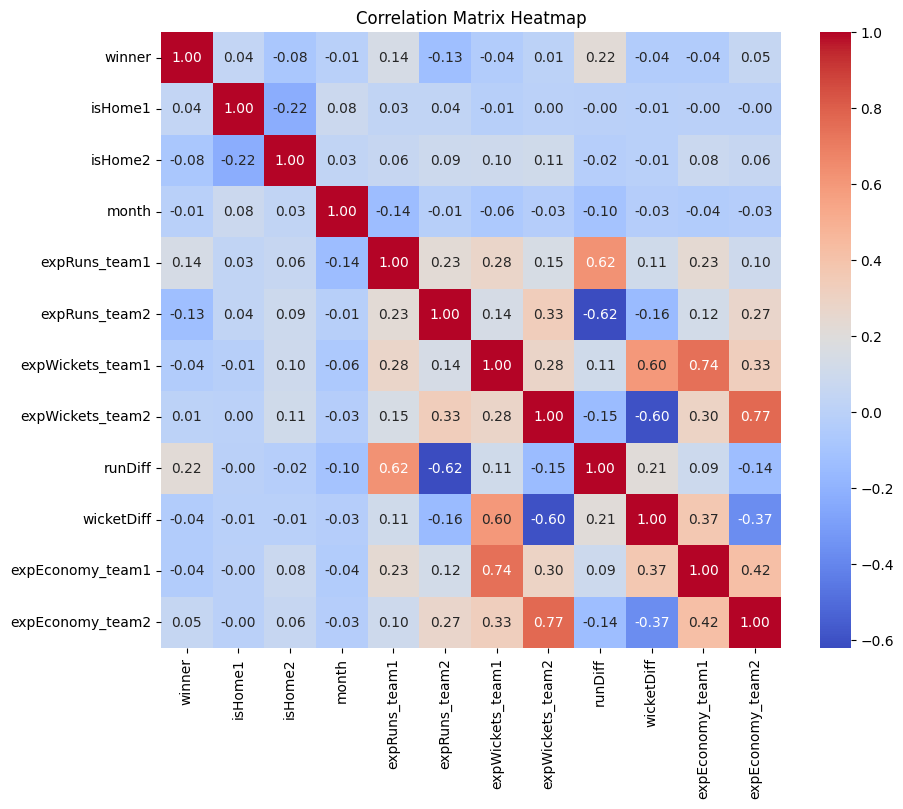

In [106]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(dfMatchInfo[['winner','isHome1','isHome2','month','expRuns_team1','expRuns_team2','expWickets_team1','expWickets_team2','runDiff','wicketDiff','expEconomy_team1','expEconomy_team2']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Evalutation Function

In [107]:
def evaluate2(dfParam):
  
    colsX= dfParam.columns.to_list()
    colsX.pop(0)
    from sklearn.model_selection import train_test_split

    X = dfParam[colsX] 
    y = dfParam['winner']
    ""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Logistic Regression

    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, classification_report

    model = LogisticRegression( penalty="l1",
        solver="liblinear",
        tol=1e-6,
        max_iter=int(1e6),
        warm_start=True,
        intercept_scaling=10000.0)
    model.fit(X_train, y_train)

  
    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)


    print("Logistic Regression: ")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)

    #Decision Tree

    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score, classification_report

    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("decsion tree: ")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    
    # Random Forest
    

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report


    model = RandomForestClassifier(n_estimators=100, random_state=42) 
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Random Forest: ")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)

    
    #SVM
    
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, classification_report

    model = SVC(kernel='linear', C=3)  
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("SVM: ")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    
    #MLP
    
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import accuracy_score, classification_report

    model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("MLP: ")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    
#     # Import necessary libraries
#     import numpy as np
#     from sklearn import datasets
#     from sklearn.linear_model import Lasso
#     from sklearn.model_selection import train_test_split
#     from sklearn.metrics import mean_squared_error

#     # Create and train the Lasso regression model
#     alpha = 0.01  # Regularization strength (adjust as needed)
#     lasso = Lasso(alpha=alpha)
#     lasso.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = lasso.predict(X_test)
    
#     print("lasso regression")
#     # Calculate and print the mean squared error
#     mse = mean_squared_error(y_test, y_pred)
#     print(f"Mean Squared Error: {mse}")

#     # Print the coefficients of the model
#     print("Lasso Coefficients:", lasso.coef_)

#     # Identify the most important features (non-zero coefficients)
#     important_features = np.where(lasso.coef_ != 0)[0]
#     print("Important Features:", important_features)



In [108]:
def evaluate(dfParam):
    import pandas as pd
    dfEnc = pd.get_dummies(dfParam, columns=['team1'], prefix='team1')
    dfEnc = pd.get_dummies(dfEnc, columns=['team2'], prefix='team2')
    dfEnc = pd.get_dummies(dfEnc, columns=['tossDecision'], prefix='team1')
    colsX= dfEnc.columns.to_list()
    colsX.pop(0)
    from sklearn.model_selection import train_test_split

    X = dfEnc[colsX] 
    y = dfEnc['winner']
    ""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Logistic Regression

    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, classification_report

    model = LogisticRegression( penalty="l1",
        solver="liblinear",
        tol=1e-6,
        max_iter=int(1e6),
        warm_start=True,
        intercept_scaling=10000.0)
    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)
    

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("Logistic Regression: ")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)



    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score, classification_report


    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

 
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    
    print("decsion tree: ")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    
    # Random Forest
    

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report


    model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters like the number of trees (n_estimators)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

 
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)


    print("Random Forest: ")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)

    
    #SVM
    
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, classification_report


    model = SVC(kernel='linear', C=1) 
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("SVM: ")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    
    #MLP
    
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import accuracy_score, classification_report

    model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print("MLP: ")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    
    import xgboost as xgb
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    

    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)


    param = {
        'max_depth': 3,  
        'objective': 'multi:softmax',  
        'num_class': 2,
        'eval_metric': 'mlogloss',
    }

    num_round = 100  
    bst = xgb.train(param, dtrain, num_round)


    y_pred = bst.predict(dtest)


    print("XgBoost")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
   

    
#       # Import necessary libraries
#     import numpy as np
#     from sklearn import datasets
#     from sklearn.linear_model import Lasso
#     from sklearn.model_selection import train_test_split
#     from sklearn.metrics import mean_squared_error

#     # Create and train the Lasso regression model
#     alpha = 0.01  # Regularization strength (adjust as needed)
#     lasso = Lasso(alpha=alpha)
#     lasso.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = lasso.predict(X_test)
    
#     print("lasso regression")
#     # Calculate and print the mean squared error
#     mse = mean_squared_error(y_test, y_pred)
#     print(f"Mean Squared Error: {mse}")

#     # Print the coefficients of the model
#     print("Lasso Coefficients:", lasso.coef_)

#     # Identify the most important features (non-zero coefficients)
#     important_features = np.where(lasso.coef_ != 0)[0]
#     print("Important Features:", X.columns[important_features])

    


In [109]:
def encodeCat(dfParam,colList):
    import pandas as pd
    dfEnc = pd.get_dummies(dfParam, columns=['team1'], prefix='team1')
    dfEnc = pd.get_dummies(dfEnc, columns=['team2'], prefix='team2')
    dfEnc = pd.get_dummies(dfEnc, columns=['tossDecision'], prefix='team1')
    
    return dfEnc[colList.intersection(dfEnc.columns)];

In [110]:
evaluate(dfMatchInfo)

Logistic Regression: 
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.57      0.64       207
           1       0.69      0.82      0.75       244

    accuracy                           0.71       451
   macro avg       0.71      0.69      0.69       451
weighted avg       0.71      0.71      0.70       451

decsion tree: 
Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.48      0.50       207
           1       0.59      0.64      0.61       244

    accuracy                           0.56       451
   macro avg       0.56      0.56      0.56       451
weighted avg       0.56      0.56      0.56       451

Random Forest: 
Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.51      0.56       207
           1       0.64      0.75      0.69       244

    accuracy   

In [111]:
evaluate(dfMatchInfo[['winner','team1','team2','tossDecision','runDiff','wicketDiff']])

Logistic Regression: 
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.57      0.64       207
           1       0.69      0.83      0.75       244

    accuracy                           0.71       451
   macro avg       0.71      0.70      0.70       451
weighted avg       0.71      0.71      0.70       451

decsion tree: 
Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.50      0.51       207
           1       0.60      0.63      0.61       244

    accuracy                           0.57       451
   macro avg       0.57      0.56      0.56       451
weighted avg       0.57      0.57      0.57       451

Random Forest: 
Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.54      0.57       207
           1       0.65      0.72      0.68       244

    accuracy   

In [112]:
evaluate(dfMatchInfo[['winner','team1','team2','tossDecision','runDiff']])

Logistic Regression: 
Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.57      0.64       207
           1       0.69      0.82      0.75       244

    accuracy                           0.70       451
   macro avg       0.71      0.69      0.69       451
weighted avg       0.71      0.70      0.70       451

decsion tree: 
Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.49      0.51       207
           1       0.60      0.64      0.62       244

    accuracy                           0.57       451
   macro avg       0.57      0.57      0.57       451
weighted avg       0.57      0.57      0.57       451

Random Forest: 
Accuracy: 0.62
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.54      0.56       207
           1       0.64      0.69      0.66       244

    accuracy   

In [113]:
evaluate(dfMatchInfo[['winner','team1','team2','tossDecision','wicketDiff']])

Logistic Regression: 
Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.55      0.63       207
           1       0.68      0.83      0.75       244

    accuracy                           0.70       451
   macro avg       0.71      0.69      0.69       451
weighted avg       0.71      0.70      0.69       451

decsion tree: 
Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.58      0.57       207
           1       0.63      0.60      0.61       244

    accuracy                           0.59       451
   macro avg       0.59      0.59      0.59       451
weighted avg       0.59      0.59      0.59       451

Random Forest: 
Accuracy: 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.56      0.58       207
           1       0.65      0.69      0.67       244

    accuracy   

In [114]:
bolwerInfo= {
    'name': bowlerRuns.keys(),
    'runsGiven': bowlerRuns.values(),
    'wicketsTaken': bowlerWickets.values(),
    'matchPlayed':  deliveryCount.values(),
    'deliveryCount':deliveryCount.values(),
    
}

In [115]:
dfBowlerInfo=pd.DataFrame(bolwerInfo)

In [116]:
dfBowlerInfo['economy']=dfBowlerInfo.runsGiven/dfBowlerInfo.deliveryCount * 6

In [117]:
dfBowlerInfo['bowlingAverage']=dfBowlerInfo.runsGiven/dfBowlerInfo.wicketsTaken

In [118]:
dfBowlerInfo

,name,runsGiven,wicketsTaken,matchPlayed,deliveryCount,economy,bowlingAverage
0,SH Johnson,91,1,62,62,8.806452,91.000000
1,JR Hazlewood,3121,115,3945,3945,4.746768,27.139130
2,SA Abbott,776,21,821,821,5.671133,36.952381
3,C Green,649,16,664,664,5.864458,40.562500
4,A Zampa,4207,143,4533,4533,5.568498,29.419580
...,...,...,...,...,...,...,...
1815,NRJ Croes,30,1,12,12,15.000000,30.000000
1816,Abdul Rahman,30,1,12,12,15.000000,30.000000
1817,Tanzid Hasan,30,1,12,12,15.000000,30.000000
1818,SR Hain,30,1,12,12,15.000000,30.000000


In [119]:
len(dfBowlerInfo)

1820

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


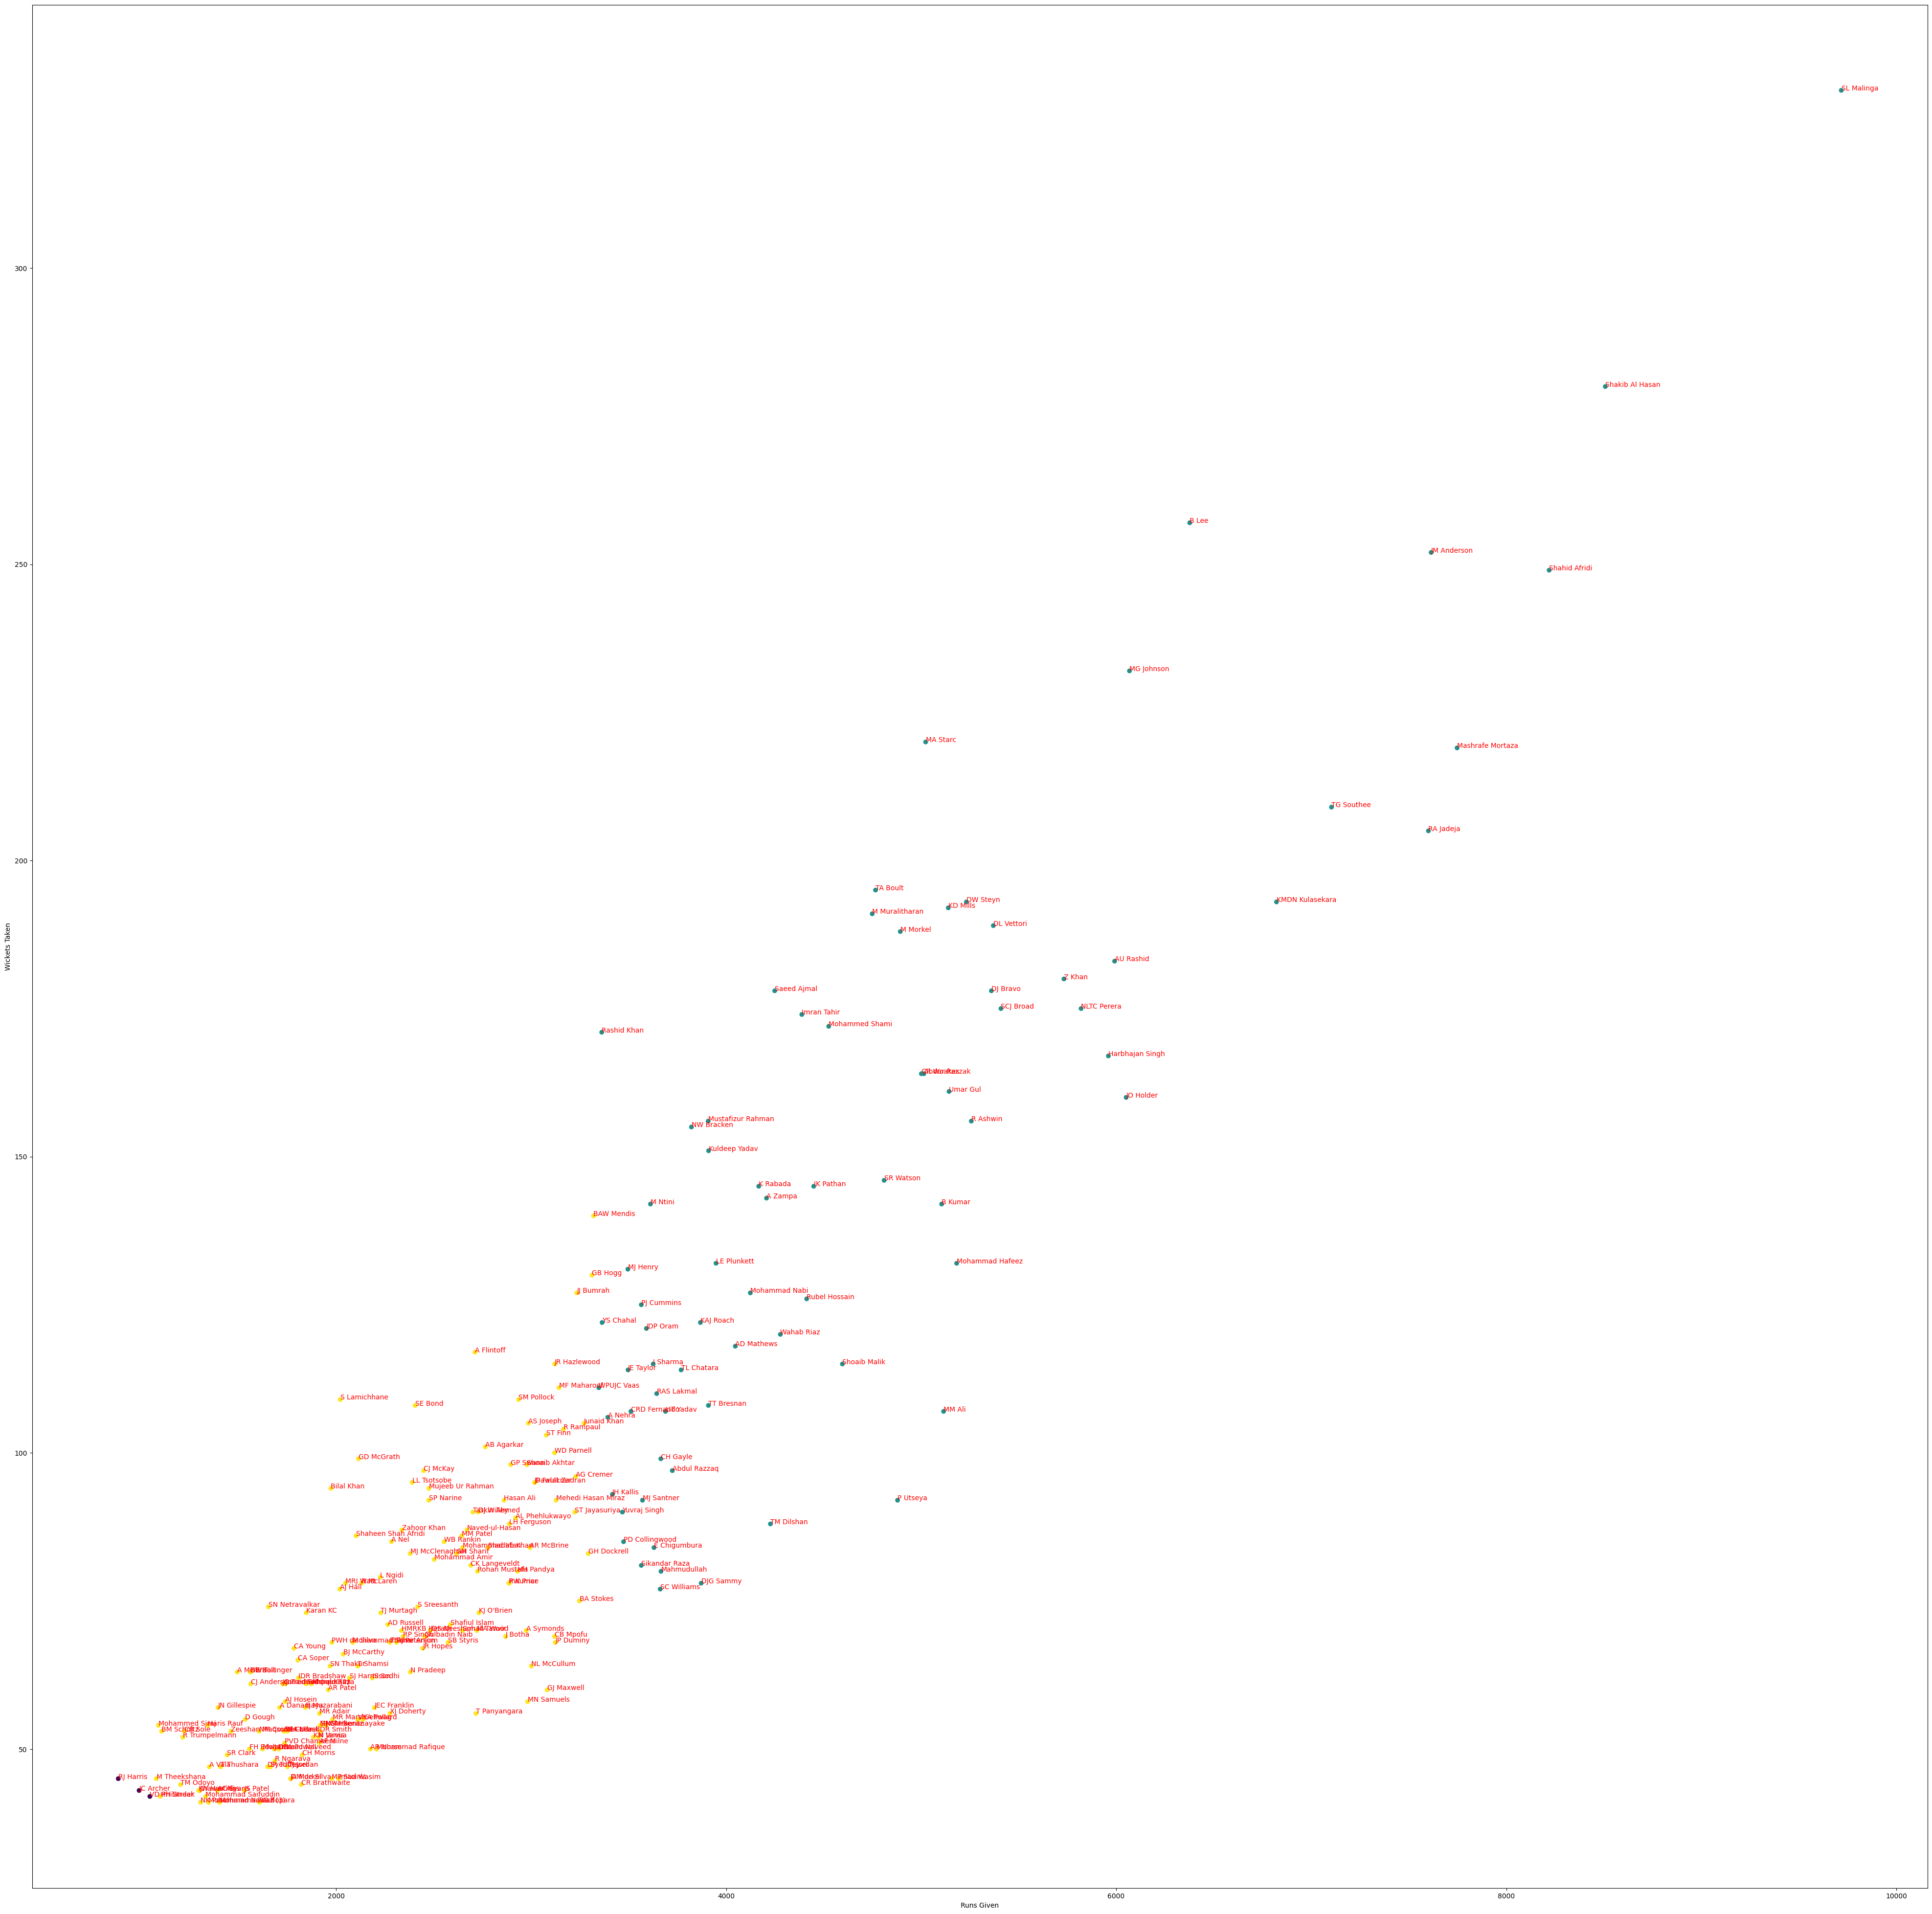

In [120]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


XToCluster = dfBowlerInfo[['runsGiven', 'wicketsTaken']]

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(XToCluster)

dfBowlerInfo['cluster'] = kmeans.labels_

plt.figure(figsize=(50, 50))
plt.scatter(dfBowlerInfo[dfBowlerInfo.wicketsTaken>40]['runsGiven'], dfBowlerInfo[dfBowlerInfo.wicketsTaken>40]['wicketsTaken'], c=dfBowlerInfo[dfBowlerInfo.wicketsTaken>40]['cluster'], cmap='viridis')
for i, row in dfBowlerInfo.iterrows():
    if row['wicketsTaken']>40:
        plt.annotate(row['name'], (row['runsGiven'], row['wicketsTaken']), fontsize=10, color='red')
plt.xlabel('Runs Given')
plt.ylabel('Wickets Taken')
plt.show()



/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


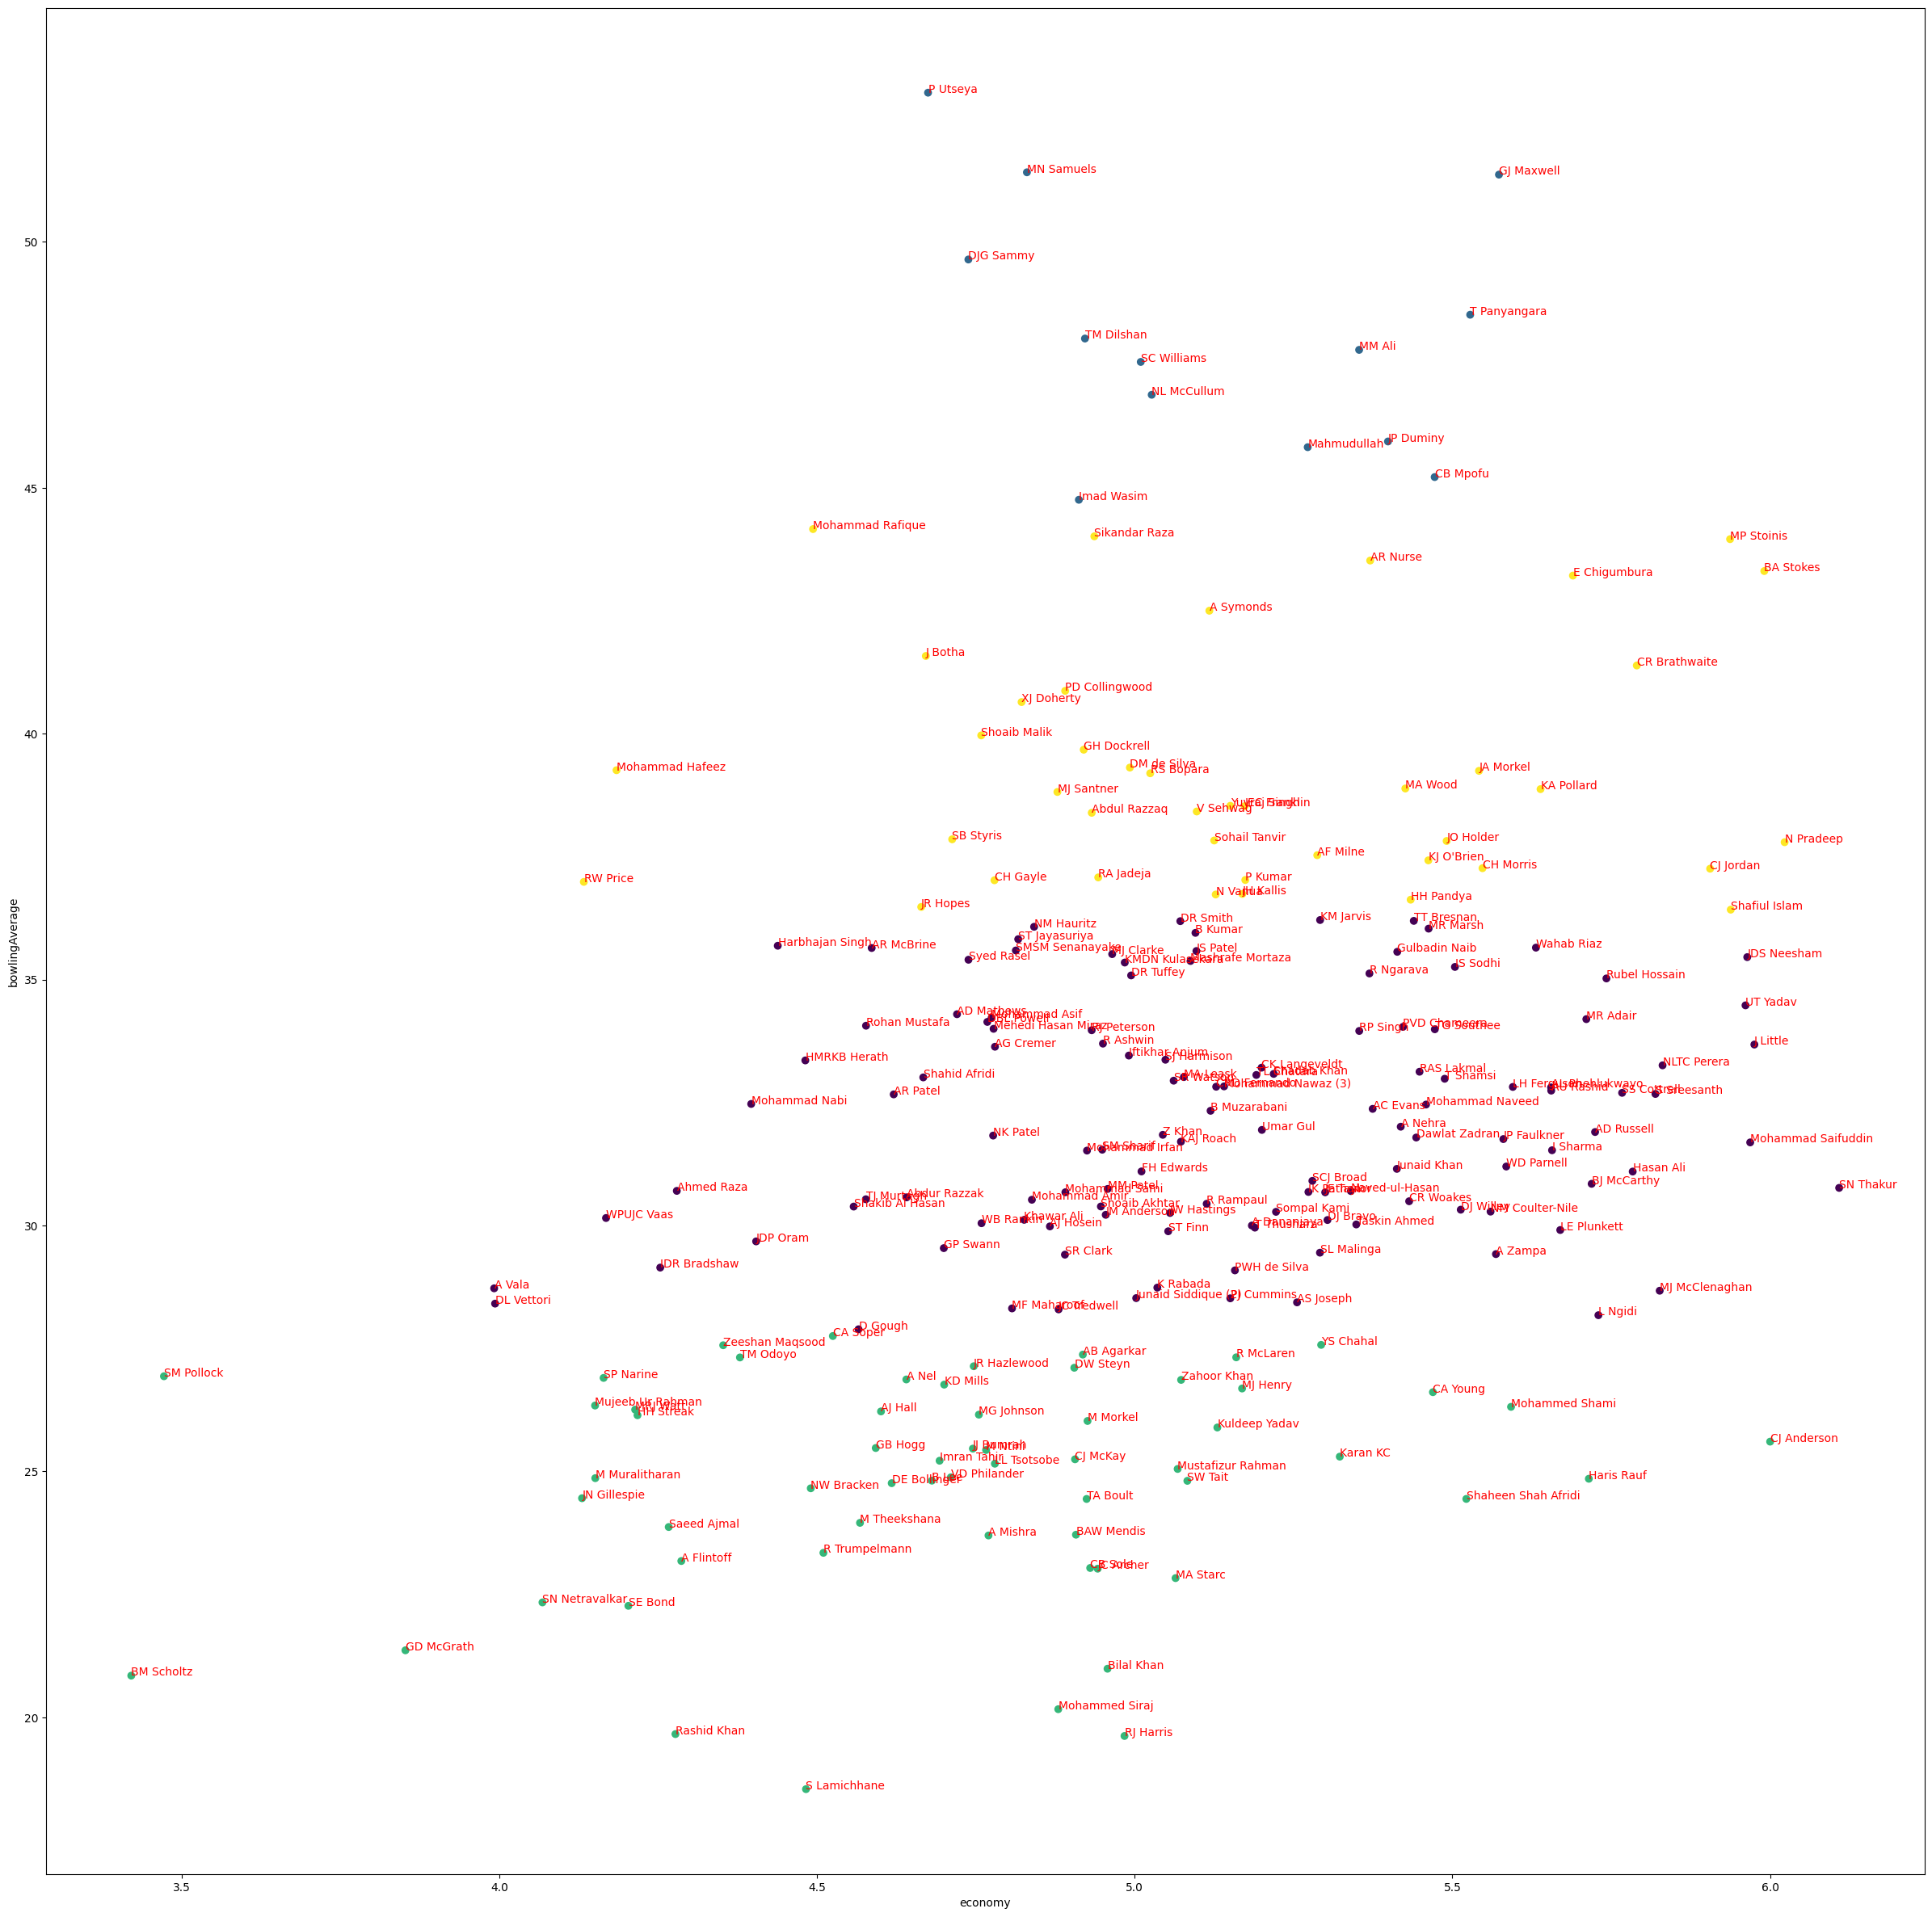

In [122]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


XToCluster = dfBowlerInfo[['economy', 'bowlingAverage']]

n_clusters = 10

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(XToCluster)

dfBowlerInfo['cluster'] = kmeans.labels_

plt.figure(figsize=(30, 30))
plt.scatter(dfBowlerInfo[dfBowlerInfo.wicketsTaken>40]['economy'], dfBowlerInfo[dfBowlerInfo.wicketsTaken>40]['bowlingAverage'], c=dfBowlerInfo[dfBowlerInfo.wicketsTaken>40]['cluster'], cmap='viridis')
for i, row in dfBowlerInfo.iterrows():
    if row['wicketsTaken']>40:
        plt.annotate(row['name'], (row['economy'], row['bowlingAverage']), fontsize=10, color='red')
plt.xlabel('economy')
plt.ylabel('bowlingAverage')
plt.savefig('bowlersClustered.png')
plt.show()

In [123]:
dfBowlerInfo.head()

,name,runsGiven,wicketsTaken,matchPlayed,deliveryCount,economy,bowlingAverage,cluster
0,SH Johnson,91,1,62,62,8.806452,91.000000,7
1,JR Hazlewood,3121,115,3945,3945,4.746768,27.139130,6
2,SA Abbott,776,21,821,821,5.671133,36.952381,9
3,C Green,649,16,664,664,5.864458,40.562500,9
4,A Zampa,4207,143,4533,4533,5.568498,29.419580,0


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


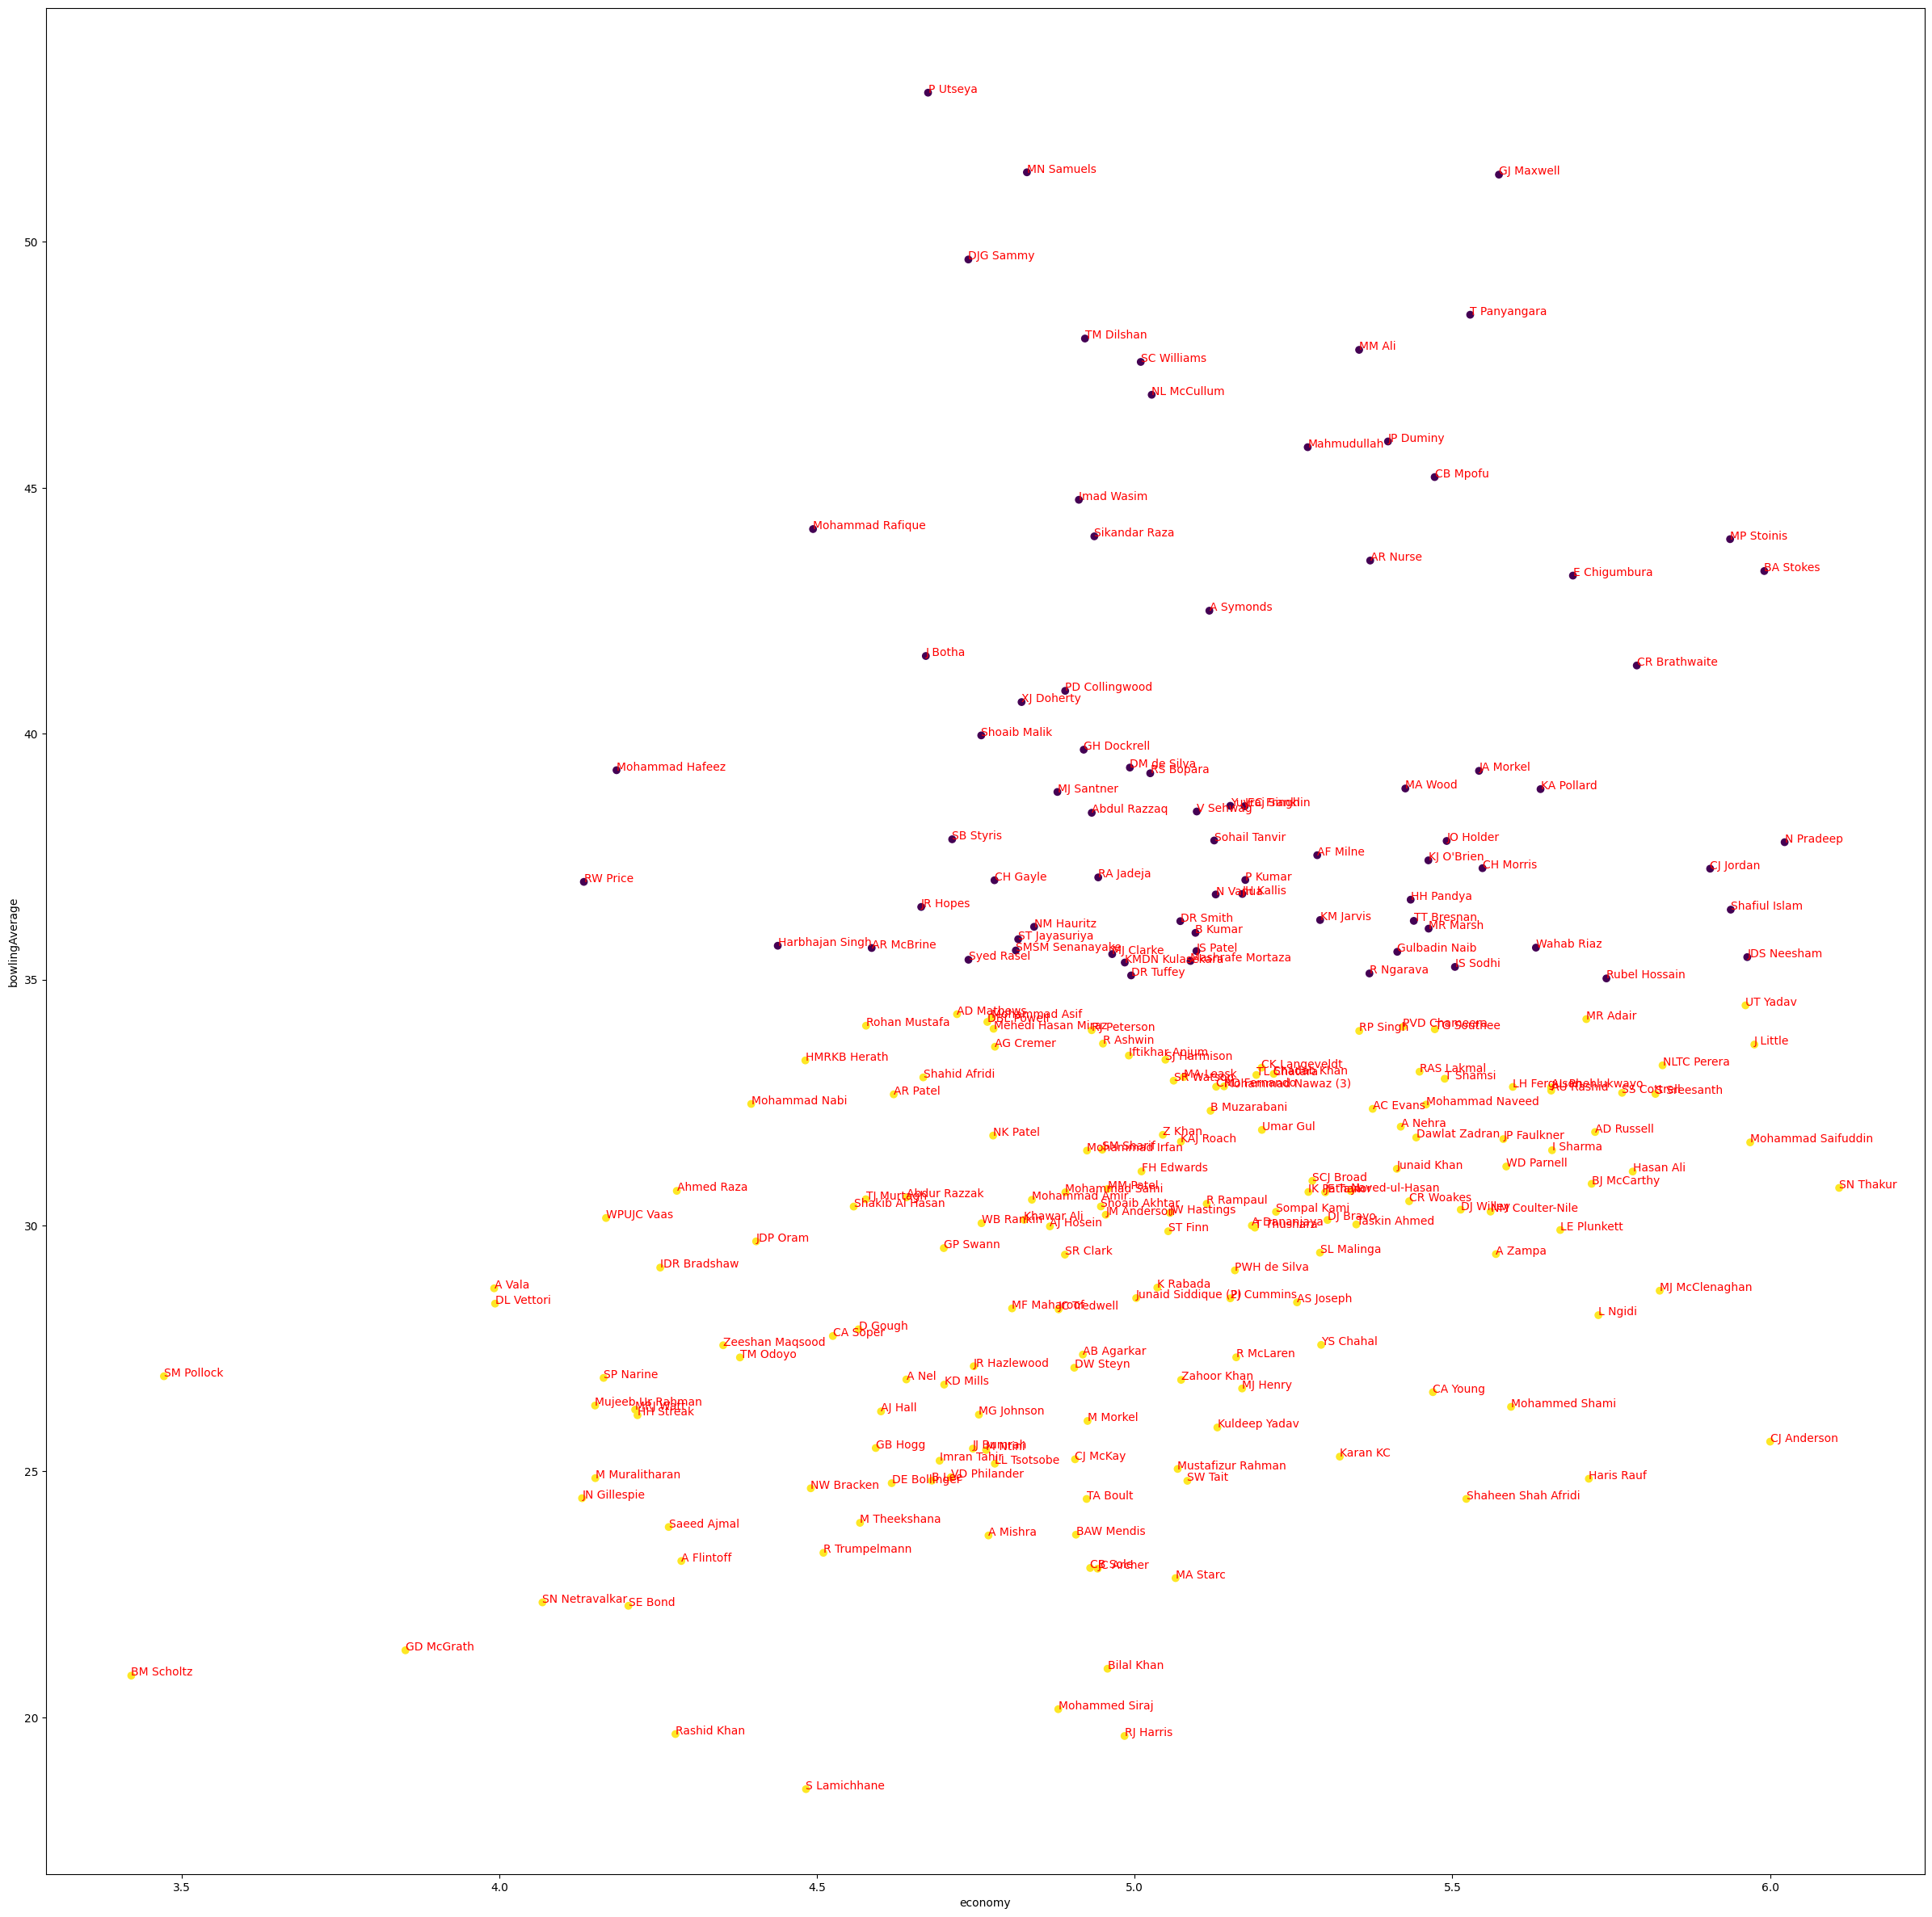

In [124]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


XToCluster = dfBowlerInfo[['economy', 'bowlingAverage']]

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(XToCluster)

dfBowlerInfo['cluster'] = kmeans.labels_

plt.figure(figsize=(30, 30))
plt.scatter(dfBowlerInfo[dfBowlerInfo.wicketsTaken>40]['economy'], dfBowlerInfo[dfBowlerInfo.wicketsTaken>40]['bowlingAverage'], c=dfBowlerInfo[dfBowlerInfo.wicketsTaken>40]['cluster'], cmap='viridis')
for i, row in dfBowlerInfo.iterrows():
    if row['wicketsTaken']>40:
        plt.annotate(row['name'], (row['economy'], row['bowlingAverage']), fontsize=10, color='red')
plt.xlabel('economy')
plt.ylabel('bowlingAverage')
plt.show()

# A player does not perform everyday , maybe a likelihood of performance feature, Player standard deviations? A team average as a feature? Single ratio?  4 ratio? 6 ratio? 

In [125]:
dfMatchInf.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus


In [126]:
dfMatchInf.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [127]:
dfMatchData.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id'],
      dtype='object')

In [128]:
dfMatchInf.team2.unique().tolist()

['Australia',
 'Ireland',
 'Bangladesh',
 'India',
 'New Zealand',
 'Sri Lanka',
 'Pakistan',
 'South Africa',
 'Afghanistan',
 'Nepal',
 'West Indies',
 'Netherlands',
 'United States of America',
 'Zimbabwe',
 'Oman',
 'Scotland',
 'United Arab Emirates',
 'Papua New Guinea',
 'Jersey',
 'Canada',
 'Namibia',
 'England',
 'Hong Kong',
 'Kenya',
 'Bermuda',
 'Asia XI',
 'ICC World XI']

In [129]:
teamList= dfMatchInf.team1.unique().tolist()
teamList.extend(dfMatchInf.team2.unique().tolist());
teamMatchCount={key:0 for key in teamList}
teamRunList={key:0 for key in teamList}
teamAvgRunList={ key1: {key:0 for key in teamList} for key1 in dfMatchInf.id}


In [130]:
def addTeamAverage(row):

    idx=row.id;
    battingTeam1=row.team1;
    battingTeam2=row.team2;
    teamMatchCount[battingTeam1]+=1;
    teamMatchCount[battingTeam2]+=1;
    count1=teamMatchCount[battingTeam1];
    count2=teamMatchCount[battingTeam2]
    if count1==0:
        count1=1;
    if count2==0:
        count2=1;
    avgRun1= teamRunList[battingTeam1]/count1
    avgRun2= teamRunList[battingTeam2]/count2
    teamAvgRunList[idx][battingTeam1]=avgRun1;
    teamAvgRunList[idx][battingTeam2]=avgRun2;
    runTeam1=calcTeamRuns(idx,battingTeam1)
    runTeam2=calcTeamRuns(idx,battingTeam2)
    teamRunList[battingTeam1]+=runTeam1
    teamRunList[battingTeam2]+=runTeam2


In [131]:
# dfMatchData[(dfMatchData.match_id==1389389) & (dfMatchData.batting_team=='India')]

In [132]:
def calcTeamRuns(idx,teamName):
    arr=['runs_off_bat', 'extras']
    runs=0;
    runs=sum(dfMatchData[(dfMatchData.match_id==idx) & (dfMatchData.batting_team==teamName)][arr].sum())
    
    
    return runs;

In [133]:
dfMatchInf_reversed.apply(lambda x:addTeamAverage(x),axis=1 )

2378    None
2377    None
2376    None
2375    None
2374    None
        ... 
4       None
3       None
2       None
1       None
0       None
Length: 2379, dtype: object

In [134]:
def avgTeamRunsToDf(row):
    
    return teamAvgRunList[row.id][row.team1],teamAvgRunList[row.id][row.team2]

In [135]:
dfMatchInfo[['avgRunTeam1','avgRunTeam2']]=dfMatchInf.apply(lambda x: pd.Series(avgTeamRunsToDf(x)),axis=1)

In [136]:
# dfMatchInfo=dfMatchInfo.drop(columns=('avgRunTeam1', 'avgRunTeam2'))

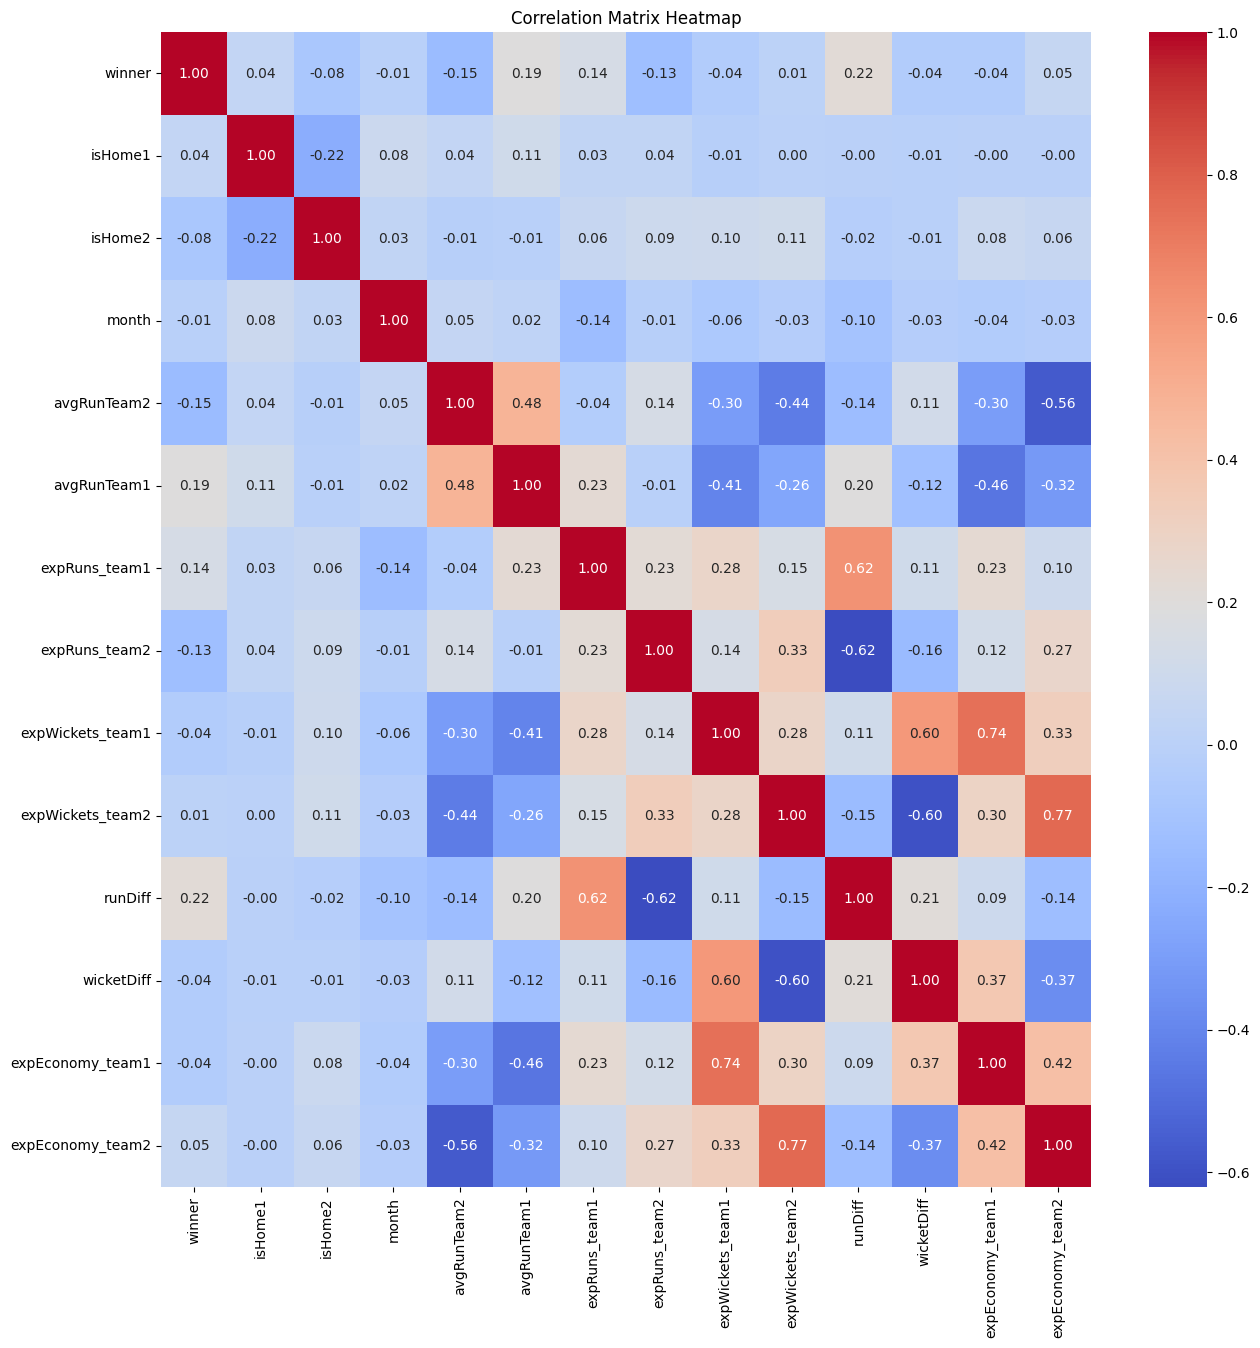

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(dfMatchInfo[['winner','isHome1','isHome2','month','avgRunTeam2','avgRunTeam1','expRuns_team1','expRuns_team2','expWickets_team1','expWickets_team2','runDiff','wicketDiff','expEconomy_team1','expEconomy_team2']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.savefig('sample_chart.png',dpi=300)
plt.show()

In [138]:
dfMatchInfo.columns

Index(['team1', 'team2', 'winner', 'isHome1', 'isHome2', 'tossDecision',
       'month', 'expRuns_team1', 'expRuns_team2', 'expEconomy_team1',
       'expEconomy_team2', 'expWickets_team1', 'expWickets_team2', 'runDiff',
       'wicketDiff', 'avgRunTeam1', 'avgRunTeam2'],
      dtype='object')

In [139]:
evaluate2(dfMatchInfo[ ['winner', 'isHome1', 'isHome2',
       ]])

Logistic Regression: 
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.11      0.18       207
           1       0.55      0.93      0.69       244

    accuracy                           0.55       451
   macro avg       0.56      0.52      0.44       451
weighted avg       0.56      0.55      0.46       451

decsion tree: 
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.11      0.18       207
           1       0.55      0.93      0.69       244

    accuracy                           0.55       451
   macro avg       0.56      0.52      0.44       451
weighted avg       0.56      0.55      0.46       451

Random Forest: 
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.11      0.18       207
           1       0.55      0.93      0.69       244

    accuracy   

In [140]:
evaluate(dfMatchInfo)

Logistic Regression: 
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.56      0.64       207
           1       0.69      0.84      0.76       244

    accuracy                           0.71       451
   macro avg       0.72      0.70      0.70       451
weighted avg       0.72      0.71      0.71       451

decsion tree: 
Accuracy: 0.64
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60       207
           1       0.66      0.67      0.67       244

    accuracy                           0.64       451
   macro avg       0.63      0.63      0.63       451
weighted avg       0.64      0.64      0.64       451

Random Forest: 
Accuracy: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.57      0.63       207
           1       0.69      0.82      0.75       244

    accuracy   

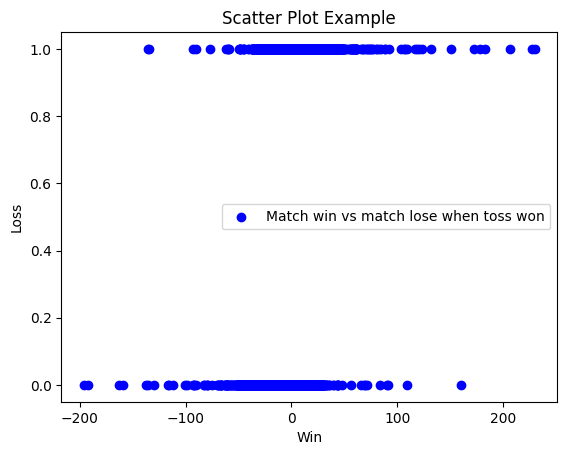

In [141]:
import matplotlib.pyplot as plt
import numpy as np

x=dfMatchInfo.avgRunTeam1.values - dfMatchInfo.avgRunTeam2.values
y= dfMatchInfo.winner.values
plt.scatter(x, y, marker='o', color='blue', label="Match win vs match lose when toss won")

# for i, label in enumerate(tossAndMatchWin.index):
#     plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Win')
plt.ylabel('Loss')
plt.title('Scatter Plot Example')

plt.legend()

plt.show()

In [142]:
dfMatchInfo.columns

Index(['team1', 'team2', 'winner', 'isHome1', 'isHome2', 'tossDecision',
       'month', 'expRuns_team1', 'expRuns_team2', 'expEconomy_team1',
       'expEconomy_team2', 'expWickets_team1', 'expWickets_team2', 'runDiff',
       'wicketDiff', 'avgRunTeam1', 'avgRunTeam2'],
      dtype='object')

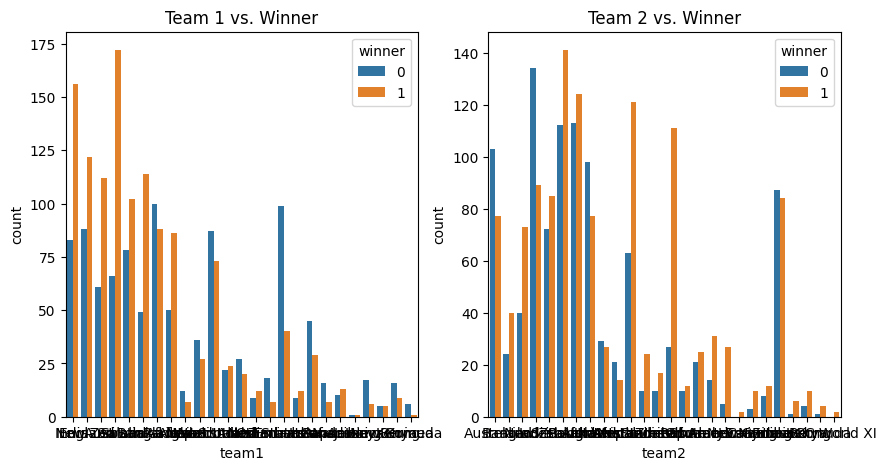

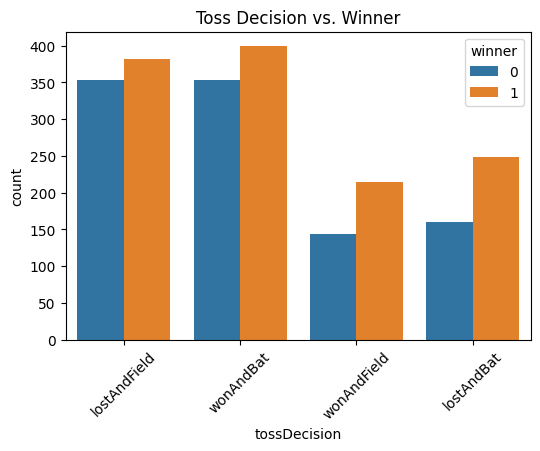

ValueError: Could not interpret input 'rundiff'

<Figure size 600x400 with 0 Axes>

In [143]:
# Example visualizations
# 1. Bar Plot for 'team1' and 'team2'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=dfMatchInfo, x='team1', hue='winner')
plt.title("Team 1 vs. Winner")

plt.subplot(1, 2, 2)
sns.countplot(data=dfMatchInfo, x='team2', hue='winner')
plt.title("Team 2 vs. Winner")
plt.show()

# 2. Stacked Bar Plot for 'tossDecision'
plt.figure(figsize=(6, 4))
sns.countplot(data=dfMatchInfo, x='tossDecision', hue='winner')
plt.title("Toss Decision vs. Winner")
plt.xticks(rotation=45)
plt.show()

# 3. Box Plot for 'expRuns_team1'
plt.figure(figsize=(6, 4))
sns.boxplot(data=dfMatchInfo, x='rundiff', y='expRuns_team1')
plt.title("Expected Runs for Team 1 vs. Winner")
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
for feature in ['expRuns_team1', 'expRuns_team2', 'expEconomy_team1', 'expEconomy_team2']:
    sns.boxplot(x='winner', y=feature, data=data)
plt.show()


In [ ]:
def calcStd():
    return 0;

In [ ]:
import matplotlib.pyplot as plt

# Model names and their respective accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [0.71, 0.56, 0.64, 0.72]

# Create a grouped bar chart for accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1

# Create a table for classification report
classification_reports = {
    'Logistic Regression': {'Precision': [0.73, 0.69], 'Recall': [0.57, 0.82], 'F1-Score': [0.64, 0.75]},
    'Decision Tree': {'Precision': [0.53, 0.59], 'Recall': [0.50, 0.62], 'F1-Score': [0.51, 0.61]},
    'Random Forest': {'Precision': [0.63, 0.64], 'Recall': [0.51, 0.75], 'F1-Score': [0.56, 0.69]},
    'SVM': {'Precision': [0.77, 0.69], 'Recall': [0.55, 0.86], 'F1-Score': [0.64, 0.77]}
}

# Create a table in text format
table = plt.table(cellText=[[f'{value:.2f}' for value in classification_reports[model]['Precision']] for model in models],
                  colLabels=['Precision (0)', 'Precision (1)'],
                  rowLabels=models,
                  loc='bottom')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

plt.show()
